In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sweetviz as sv
import dtale
import scipy.stats as stats

%matplotlib inline

In [2]:
# To display all columns:
pd.pandas.set_option('display.max_columns', None)

## Reading Data:

In [3]:
# For running in google colab:
# df = pd.read_csv(r'training.csv', na_values=-999.00)
# df_test = pd.read_csv(r'test.csv', na_values=-999.00)


# For reading Data from local system:
df = pd.read_csv(r'../data/raw/training.csv', na_values=-999.00)
df_test = pd.read_csv(r'../data/raw/test.csv', na_values=-999.00)

# Storing the event ids in variable
train_event_id, test_event_id = df['EventId'], df_test['EventId']

# Removing event ids from both dataframes
df.drop(columns='EventId', inplace=True)
df_test.drop(columns='EventId', inplace=True)

In [4]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


In [5]:
# Mapping values:

df['Label'] = df['Label'].map({'s': 1, 'b': 0})


In [6]:
# Dividing Datframe:
X_train = df.drop(columns=['Weight', 'Label'])
X_test= df_test

In [7]:
# Loding Data
df1 = pd.read_csv('../data/interim/train_MICE_median_ind.csv')
df1_test = pd.read_csv('../data/interim/test_MICE_median_ind.csv')
df1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,ind_15,ind_40,ind_70,Weight,Label
0,138.47000,51.655,97.827,27.980,0.910000,124.711000,2.666000,3.064,41.928,197.760,1.582,1.396,0.200000,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2.0,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497,False,False,False,0.002653,1
1,160.93700,68.768,103.235,48.146,3.404602,456.387937,-2.262194,3.473,2.078,125.157,0.879,1.414,0.621629,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1.0,46.226000,0.725000,1.158000,43.309039,0.271125,0.400691,46.226,False,False,True,2.233584,0
2,207.11754,162.172,125.953,35.635,2.760164,338.231864,-1.264787,3.148,9.336,197.814,3.776,1.414,0.558697,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251000,2.053000,-2.028000,43.376340,-1.070836,0.732583,44.251,True,False,True,2.347389,0
3,143.90500,81.417,80.943,0.414,3.407340,477.658851,-2.081679,3.310,0.414,75.968,2.354,-1.285,0.617685,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0.0,43.781292,-0.452922,0.841083,42.313622,-0.333805,0.495673,-0.000,False,True,True,5.446378,0
4,175.86400,16.915,134.805,16.405,3.697092,512.224159,-2.519068,3.891,16.405,57.983,1.056,-1.385,0.606945,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0.0,42.013222,-0.199417,0.220767,38.810338,-0.208926,0.188463,0.000,False,True,True,6.245333,0


# Multicolinearity:

## Checking for high correlation in entire dataset (> 0.9 or < - 0.9):

In [8]:
# Define factor value
factor = 0.9

dfcorr = df1.corr() 
dfcorr1 = dfcorr[((dfcorr > factor) & (dfcorr<1.0)) | (dfcorr < -factor)]
dfcorr1.dropna(how='all', inplace=True)
dfcorr1.dropna(axis=1, how='all', inplace=True)
dfcorr1

,DER_mass_MMC,DER_mass_vis,DER_sum_pt,PRI_met_sumet,PRI_jet_all_pt
DER_mass_MMC,NaN,0.9275,NaN,NaN,NaN
DER_mass_vis,0.9275,NaN,NaN,NaN,NaN
DER_sum_pt,NaN,NaN,NaN,0.904481,0.965628
PRI_met_sumet,NaN,NaN,0.904481,NaN,NaN
PRI_jet_all_pt,NaN,NaN,0.965628,NaN,NaN


## Removing multicollinear features using manual method:

On analysis we find, removing `DER_mass_MMC` & `DER_sum_pt` is enough.

**Note:** `DER_mass_MMC` was having high correlation (`0.91`) with `DER_mass_vis` even before imputation, but at that point there was change of bias. But after imputation it is clear.

In [9]:
df2 = df1.drop(columns=['DER_mass_MMC', 'DER_sum_pt'])
df2_test = df1_test.drop(columns=['DER_mass_MMC', 'DER_sum_pt'])

In [10]:
# Define factor value
factor = 0.9

dfcorr = df2.corr() 
dfcorr1 = dfcorr[((dfcorr > factor) & (dfcorr<1.0)) | (dfcorr < -factor)]
dfcorr1.dropna(how='all', inplace=True)
dfcorr1.dropna(axis=1, how='all', inplace=True)
dfcorr1

""


## Variance Inflation Factor:

In [11]:
# !pip install statsmodels

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 'PRI_jet_all_pt', 'PRI_lep_pt'

In [13]:
# It cannot handle categorical data & boolean data:
Xnew = df2.drop(columns=['ind_15', 'ind_40', 'ind_70'])

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xnew.columns

In [14]:
# vif_data["feature"]

In [15]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
  
np.round(vif_data.sort_values(by='VIF', ascending=False), 2)

,feature,VIF
27,PRI_jet_all_pt,61.81
3,DER_deltaeta_jet_jet,60.87
21,PRI_jet_leading_pt,42.85
6,DER_deltar_tau_lep,31.07
14,PRI_lep_pt,29.43
24,PRI_jet_subleading_pt,23.62
19,PRI_met_sumet,23.60
4,DER_mass_jet_jet,23.20
8,DER_pt_ratio_lep_tau,21.33
2,DER_pt_h,19.24


In [16]:
# df2.corr()

## Data Vizualization using Dtale:

In [17]:
import dtale

# Displays directly in jupyter notebook:
# dtale.show(df, ignore_duplicate=True)
# dtale.show(pd.DataFrame([1,2,3]), app_root='/user/johndoe/proxy/40000/`)


# d = dtale.show(df2)


# Altering data associated with D-Tale process
# FYI: this will clear any front-end settings you have at the time for this process (filter, sorts, formatting)
# d.data = tmp

# Shutting down D-Tale process
# d.kill()

# using Python's `webbrowser` package it will try and open your server's default browser to this process
# d.open_browser()

# d._main_url # /user/johndoe/proxy/40000/dtale/main/1

# d

# Transforming Data to Normal Distribution:

**Note**: Since the data is not normally distributed, StandardScalar, MinMaxScaler, RobustScaler, MaxScaler will not be usefull.

## MissingIndicator:

In [18]:
from sklearn.impute import MissingIndicator

In [19]:
## With Indicator column:
mi = MissingIndicator(sparse=False)
train_temp_ind = mi.fit_transform(X_train[['DER_mass_MMC', 'PRI_jet_leading_pt', 'DER_deltaeta_jet_jet']])
test_temp_ind = mi.transform(X_test[['DER_mass_MMC', 'PRI_jet_leading_pt', 'DER_deltaeta_jet_jet']])

## PowerTransformer:

In [20]:
from sklearn.preprocessing import PowerTransformer

In [21]:
# Transformer
pt = PowerTransformer(method='yeo-johnson')

# Training set
train_temp = pd.DataFrame(pt.fit_transform(df2.iloc[:, :-5]), 
                         columns=df2.columns[:-5])

# Test set
test_temp = pd.DataFrame(pt.transform(df2_test.iloc[:, :-3]), 
                         columns=df2_test.columns[:-3])

train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind
train_temp[['Weight', 'Label']] = df2[['Weight', 'Label']]

# Save data
train_temp.to_csv('../data/interim/train_MICE_median_ind_PowerTransformer.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median_ind_PowerTransformer.csv', index=False)

In [22]:
#EDA using Autoviz
sweet_report = sv.analyze(train_temp)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
# sweet_report.show_html("../reports/op_sv_PowerTransformer.html")

# Open the following URL in browser to see report:
# file:///C:/Users/DEEPANKAR%20MULLICK/Desktop/higgs_boson/reports/op_sv_PowerTransformer.html

                                             |                                             | [  0%]   00:00 ->…

## QuantileTransformer:

In [23]:
from sklearn.preprocessing import QuantileTransformer

In [24]:
# Transformer
qt = QuantileTransformer(output_distribution='normal')


# Training set
train_temp = pd.DataFrame(qt.fit_transform(df2.iloc[:, :-5]), 
                          columns=df2.columns[:-5])


# Test set
test_temp = pd.DataFrame(qt.transform(df2_test.iloc[:, :-3]) , columns=df2_test.columns[:-3])

train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind
train_temp[['Weight', 'Label']] = df2[['Weight', 'Label']]

# Save data
train_temp.to_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median_ind_QuantileTransformer.csv', index=False)

In [25]:
#EDA using Autoviz
sweet_report = sv.analyze(train_temp)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
# sweet_report.show_html("../reports/op_sv_QuantileTransformer.html")

# Open the following URL in browser to see report:
# file:///C:/Users/DEEPANKAR%20MULLICK/Desktop/higgs_boson/reports/op_sv_QuantileTransformer.html

                                             |                                             | [  0%]   00:00 ->…

# Outlier detection & Removal:

In [26]:
df3 = pd.read_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv')
df3_test = pd.read_csv('../data/interim/test_MICE_median_ind_QuantileTransformer.csv')

In [27]:
df3.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,ind_15,ind_40,ind_70,Weight,Label
0,0.105712,0.846853,-0.281832,-1.440634,-1.392330,1.819752,0.893908,1.227406,0.437620,1.236652,-1.196181,0.058453,0.761353,0.168367,0.595928,2.030280,-1.187827,-0.949735,-0.098914,0.645448,0.880888,0.549889,1.424478,0.395113,0.850104,1.298783,-1.864348,0.705481,False,False,False,0.002653,1
1,0.523305,0.993621,0.206519,0.437861,0.180620,-0.579631,1.675206,-0.892661,-0.680013,5.199338,0.423654,0.551654,1.679303,-2.056791,-0.254426,0.342823,0.005855,0.417762,-0.853118,-0.160548,0.137177,0.057554,0.715147,0.865277,0.557937,0.447191,0.752929,0.096192,False,False,True,2.233584,0
2,2.486980,1.404950,-0.065154,-0.671441,-0.682643,0.564616,1.137677,-0.069578,2.069243,5.199338,-0.332829,0.026349,-0.509916,-0.966420,2.186980,-0.637616,0.411534,0.760711,-1.020888,0.657100,0.137177,-0.552018,1.374973,-1.246608,0.567757,-1.198176,1.155143,0.067556,True,False,True,2.347389,0
3,0.933682,0.289815,-2.269115,0.445044,0.435037,-0.327320,1.457621,-2.031581,1.245323,-0.374936,0.374757,-1.017304,-1.251614,0.018318,0.669740,-0.326169,-2.474382,-0.166818,0.034988,-1.283001,-5.199338,-0.754588,-0.416116,0.692627,0.317645,-0.443773,0.919892,-5.199338,False,True,True,5.446378,0
4,-0.758808,1.501841,-0.637574,1.043956,0.860625,-0.915816,2.094339,0.079973,-0.373591,-0.791884,0.230091,-0.276064,-1.923204,-1.058217,-1.027247,0.551076,0.643572,-2.546230,-0.349855,-2.005767,-5.199338,-1.130445,-0.164687,0.207315,-0.592731,-0.253991,0.287972,-5.199338,False,True,True,6.245333,0


In [28]:
cols = ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight']

In [29]:
thr = 3
outliers_ind = np.array([])
for i in cols:
    mean = df3[i].mean()
    std = df3[i].std()
    lb = mean - thr*std
    ub = mean + thr*std
    outliers = df3[ (df3[i]<lb) | (df3[i]>ub)] [[i]]
    outliers_ind = np.append(outliers_ind, outliers.index)
    print(outliers)
    print('Length -', len(outliers))
    

        DER_mass_transverse_met_lep
219                       -3.142729
610                       -3.619321
631                        3.090451
961                       -3.185695
1375                       2.992480
...                             ...
246777                     3.203453
246795                    -3.002520
247841                     3.119547
247985                    -3.368840
248021                    -3.334896

[670 rows x 1 columns]
Length - 670
        DER_mass_vis
360        -3.100837
1361       -3.169563
1388       -3.143833
1703       -3.072864
1777       -3.083047
...              ...
248705      3.132640
249574     -3.102148
249680     -3.029696
249757     -3.031519
249992      3.662920

[672 rows x 1 columns]
Length - 672
        DER_pt_h
347    -3.105308
414     3.091497
453    -3.005324
462     3.099049
767    -3.050511
...          ...
249366  3.009045
249440 -3.402994
249612  3.024859
249615 -5.199338
249891 -3.198299

[644 rows x 1 columns]
Length - 644
 

In [30]:
dropping = np.unique(outliers_ind)

In [31]:
df4 = df3.drop(index=dropping)

In [32]:
len(df4)

236794

In [33]:
# Save data
df4.to_csv('../data/interim/train_MICE_med_ind_QT_dropOutlier.csv', index=False)

In [34]:
df4['Label'].value_counts()

0    156001
1     80793
Name: Label, dtype: int64

## Visualizing Data before & after dropping outliers:

In [35]:
cols = ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight']

In [36]:
def viz(df, features=df.columns):
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        sns.histplot(data=df, x=col, label="skew: " + str(np.round(df[col].skew(),2)))
        plt.legend()
        plt.subplot(132)
        sns.boxplot(data=df ,x=col)
        plt.subplot(133)
        stats.probplot(df[col], plot=plt)
        plt.tight_layout()
        plt.show()

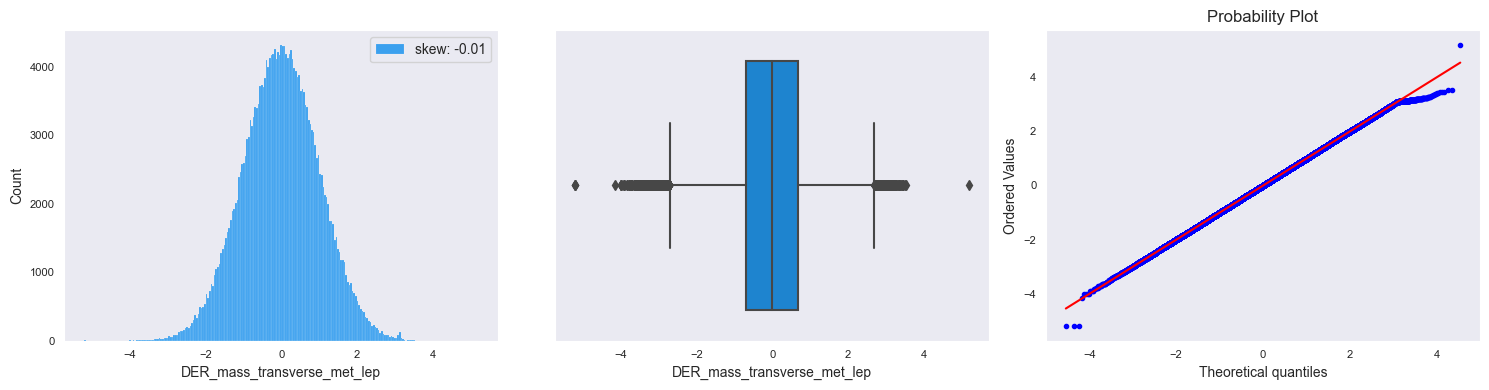

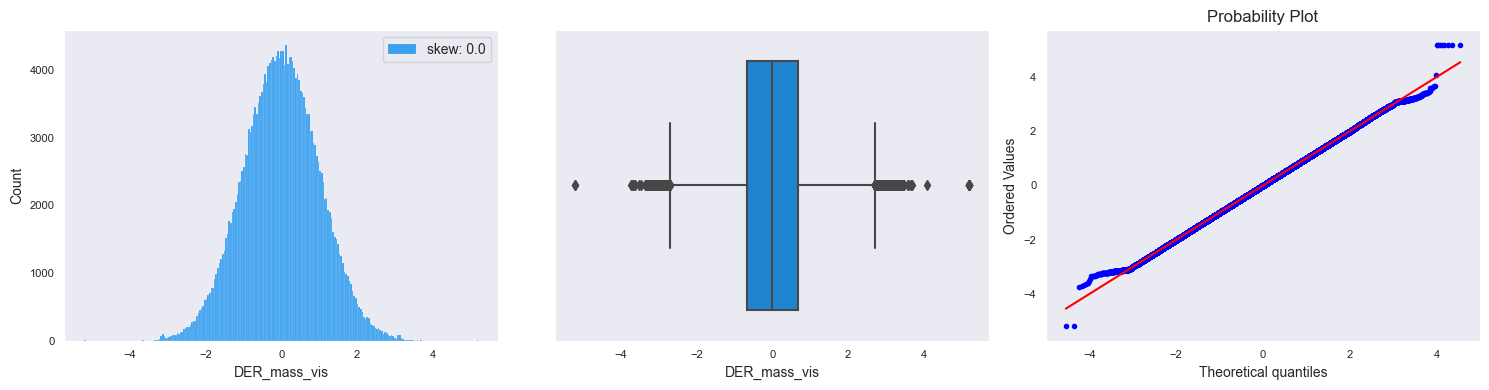

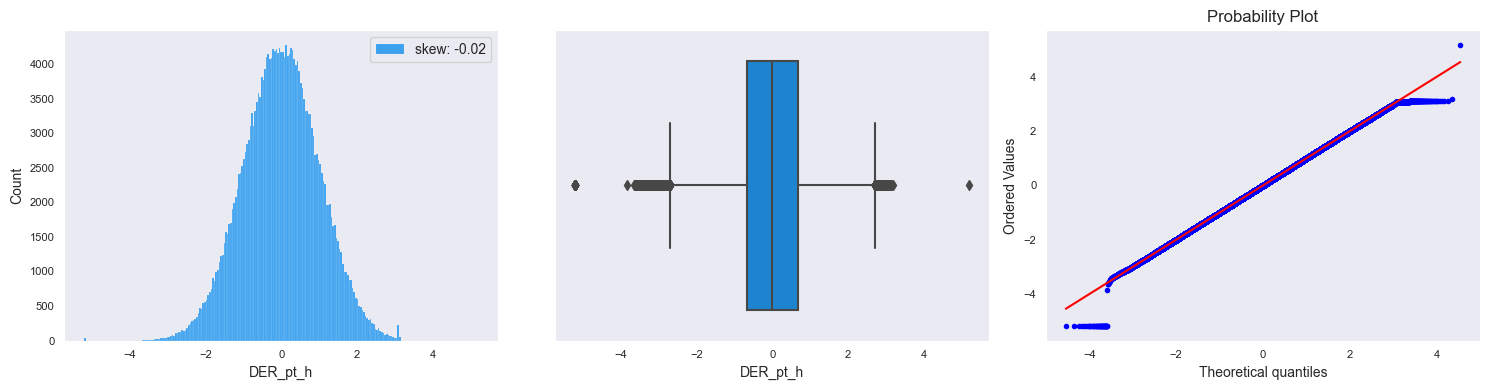

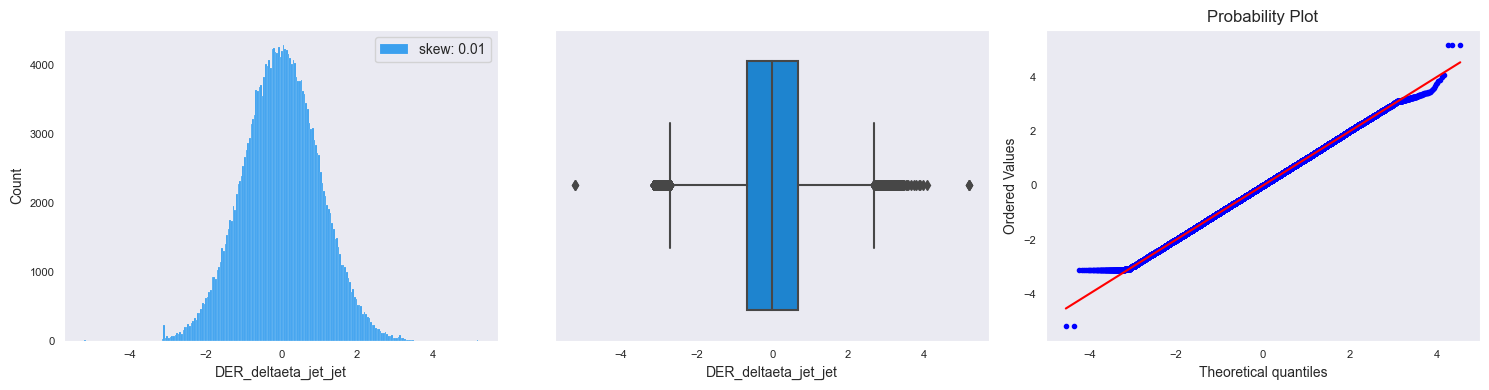

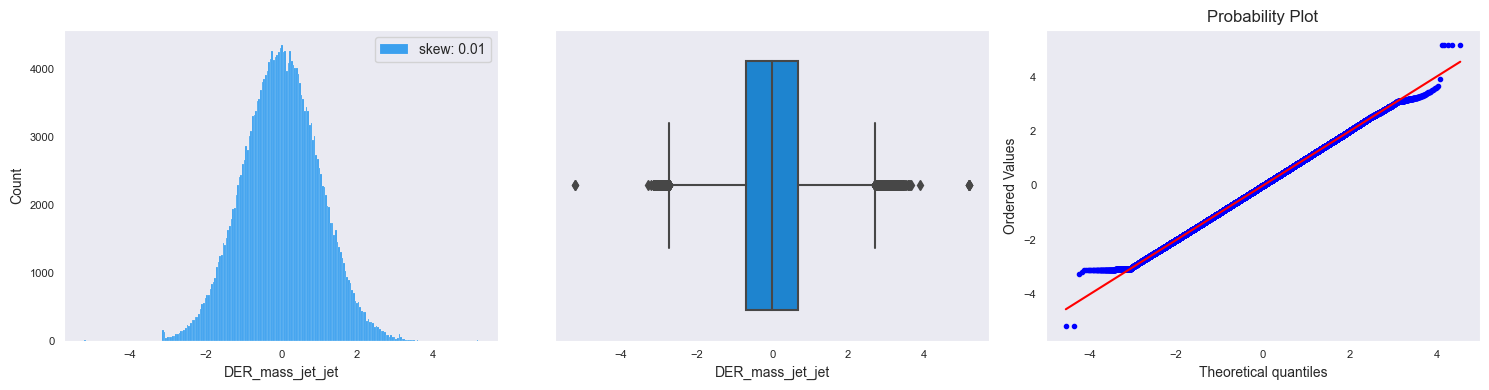

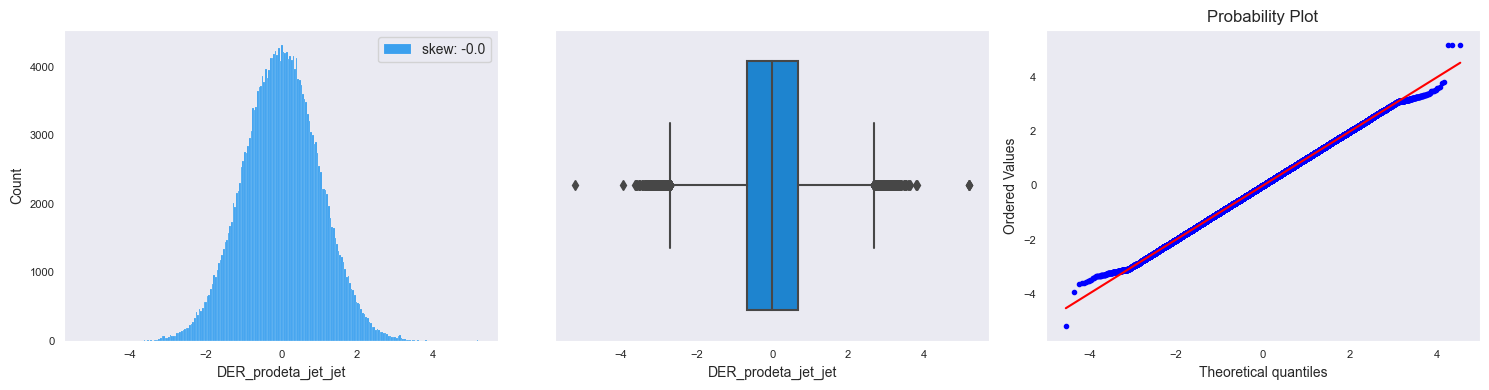

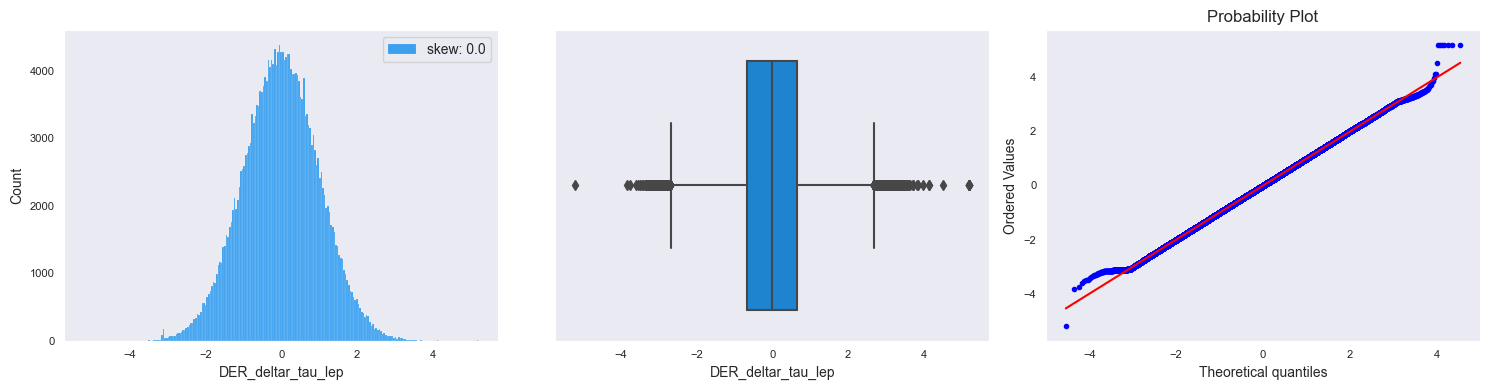

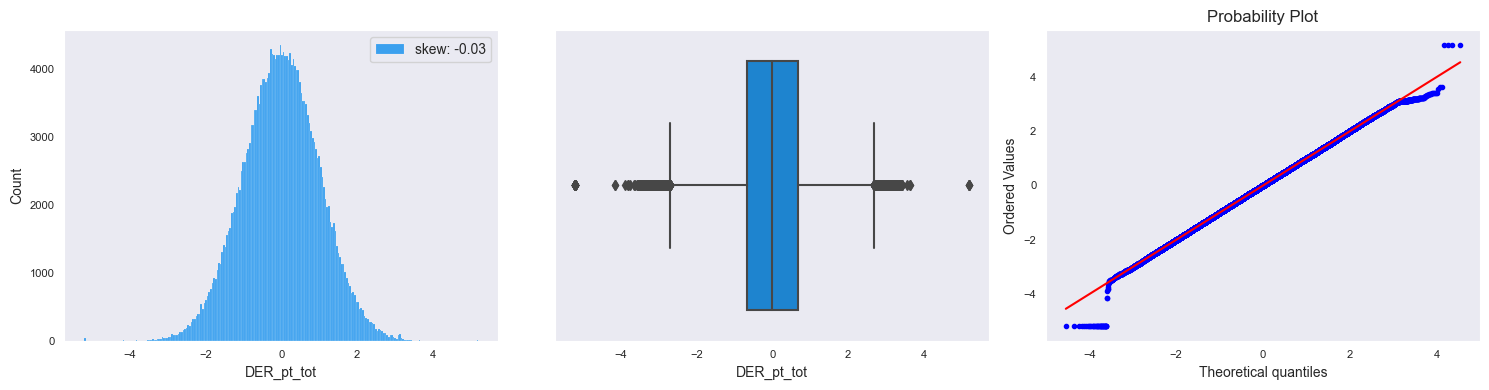

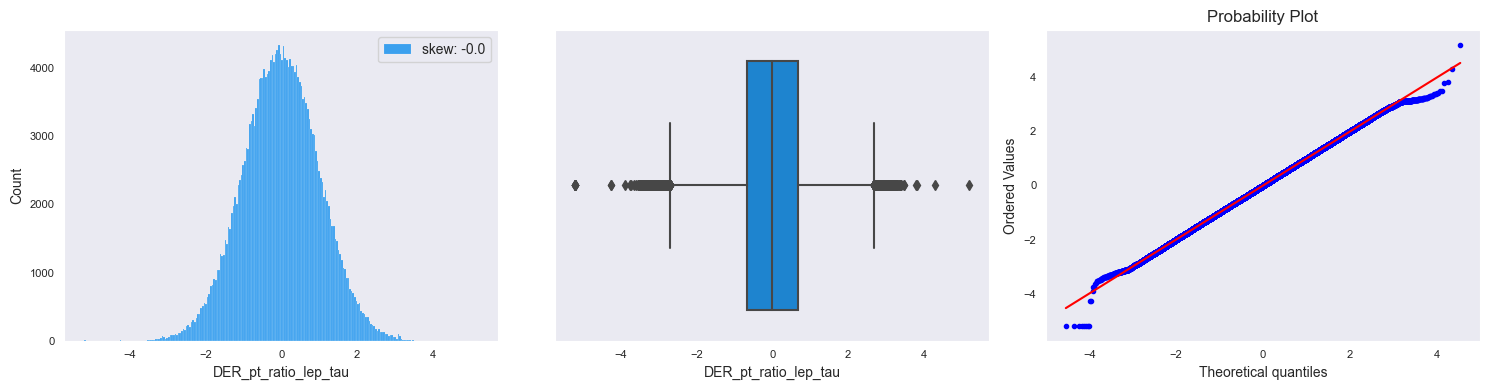

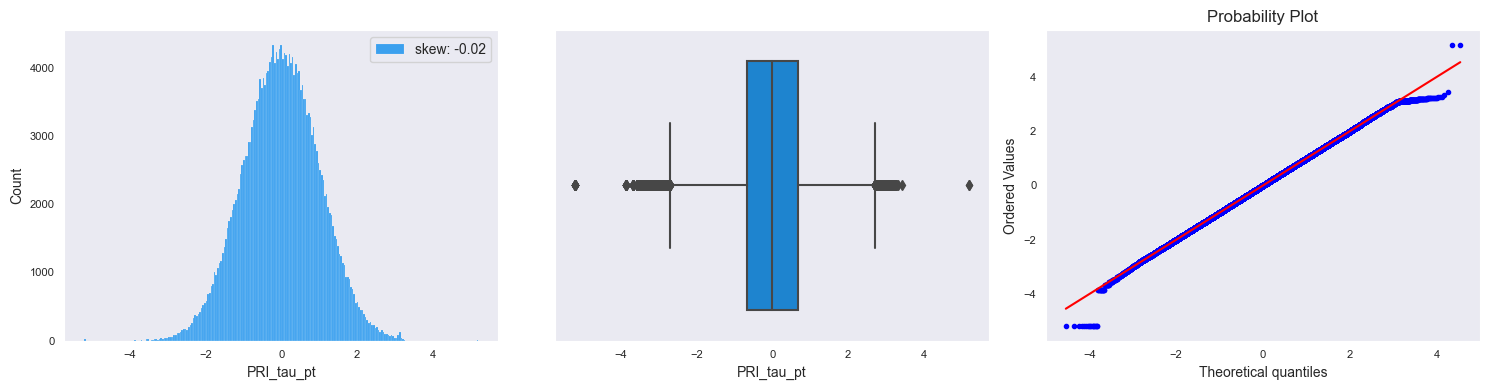

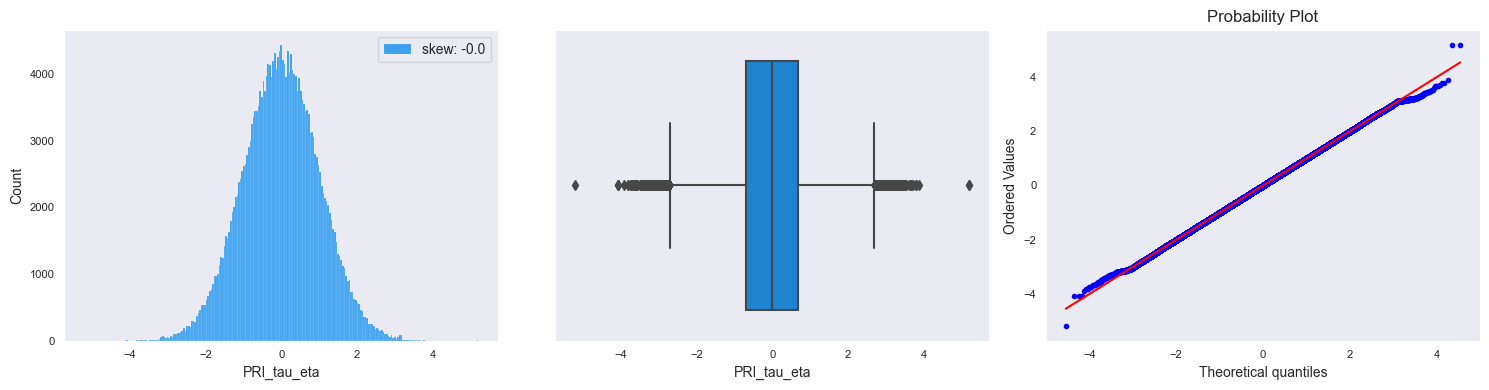

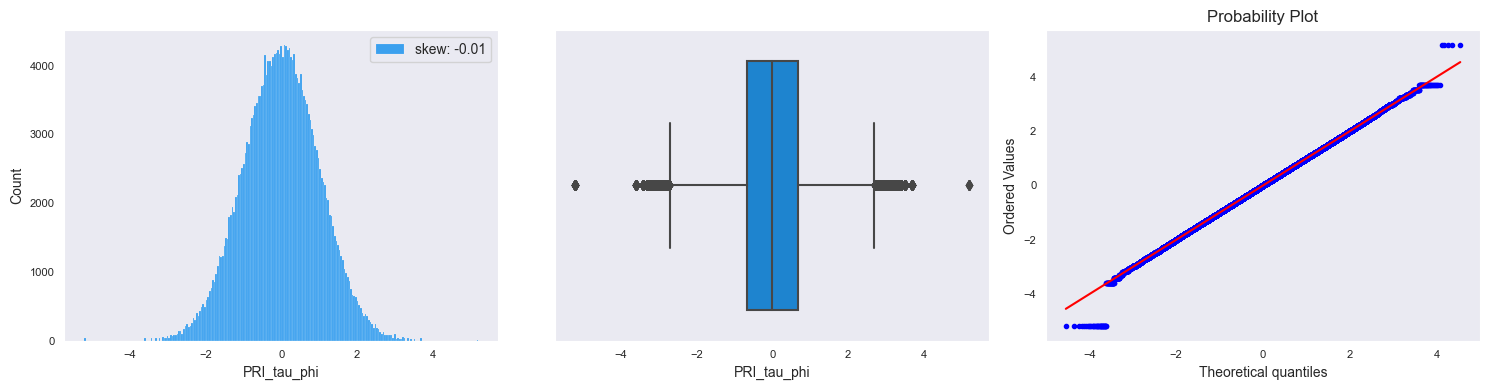

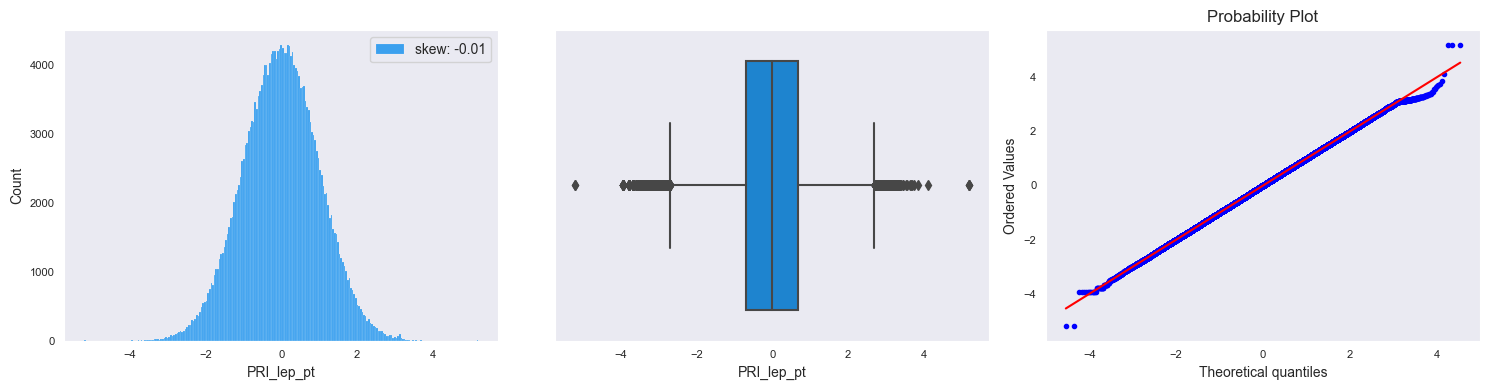

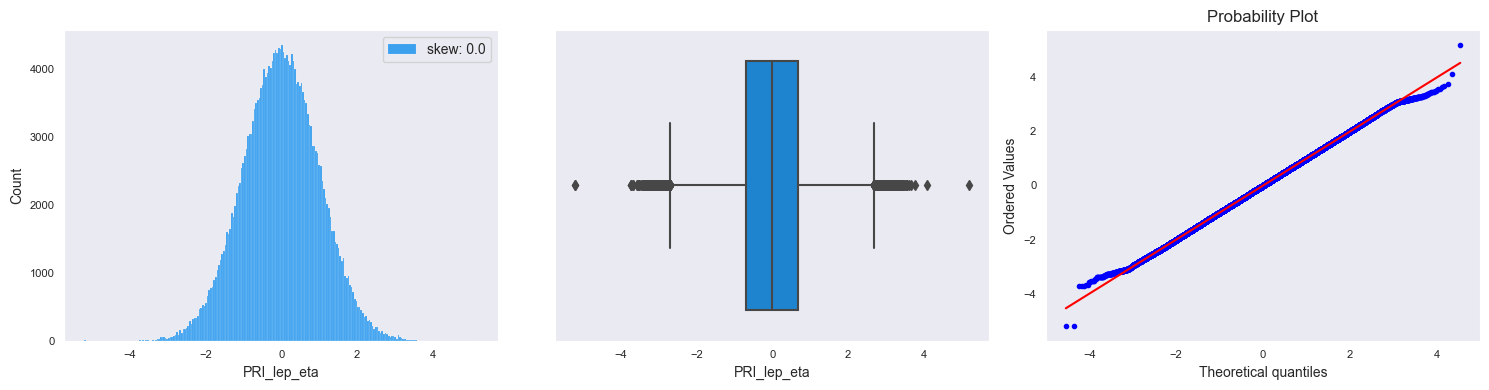

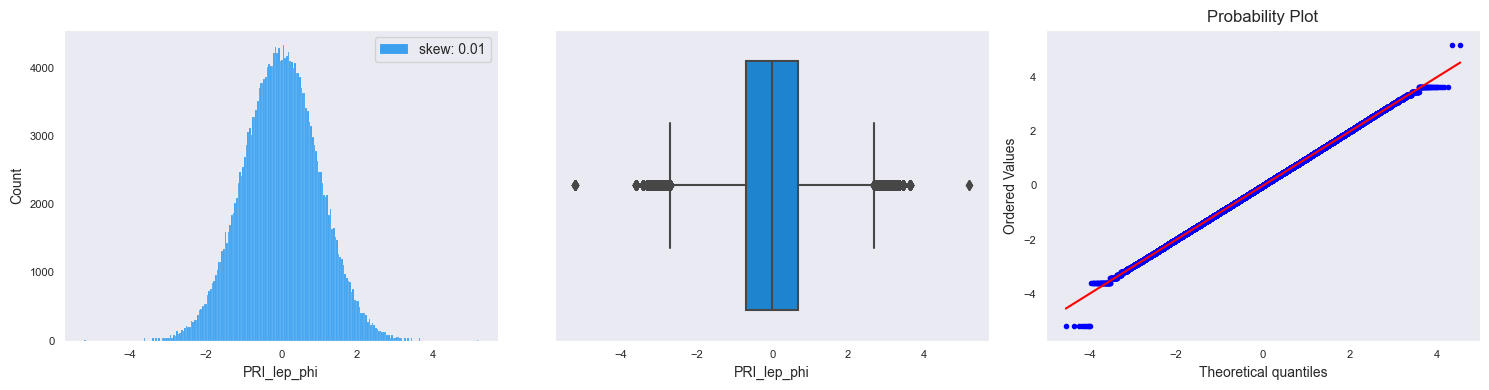

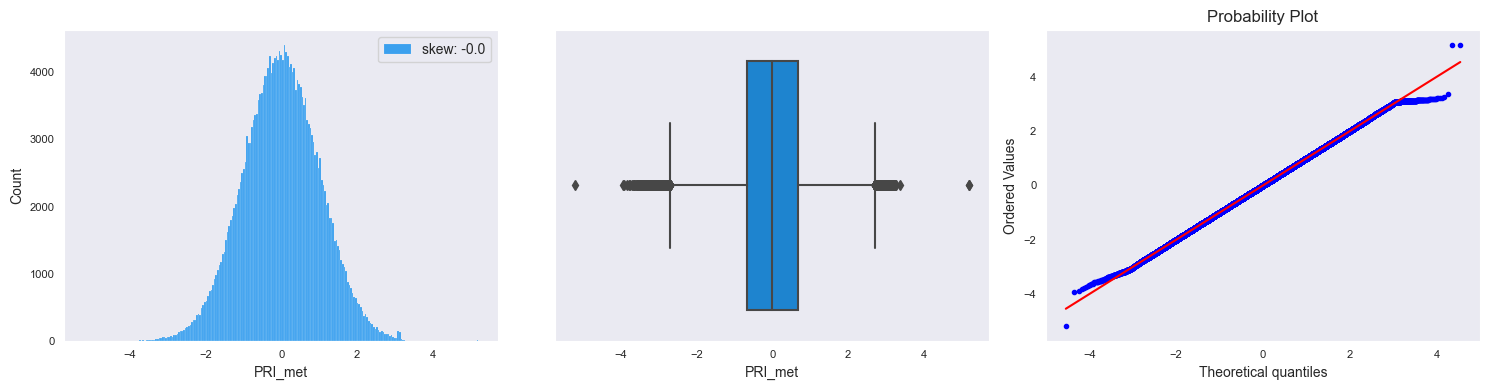

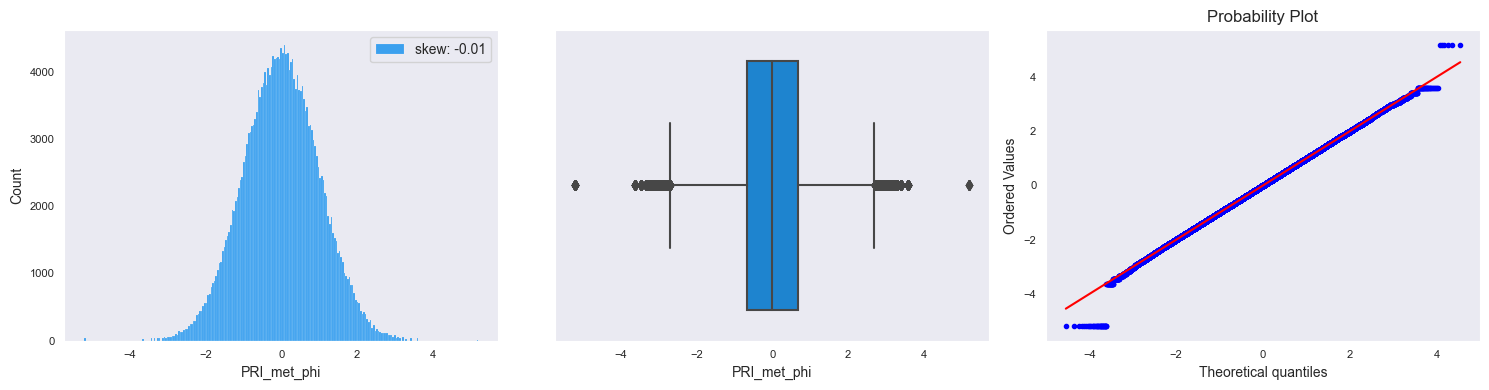

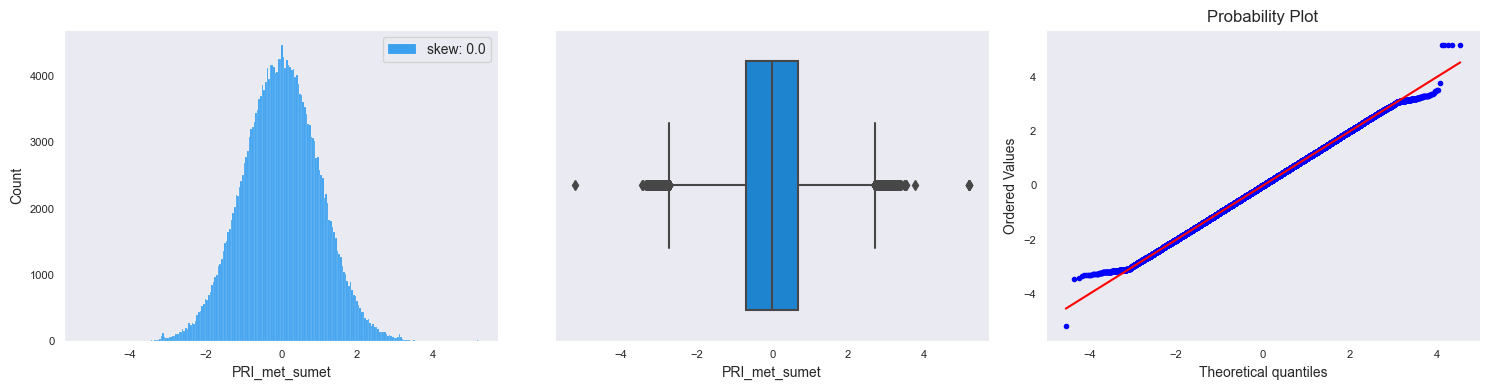

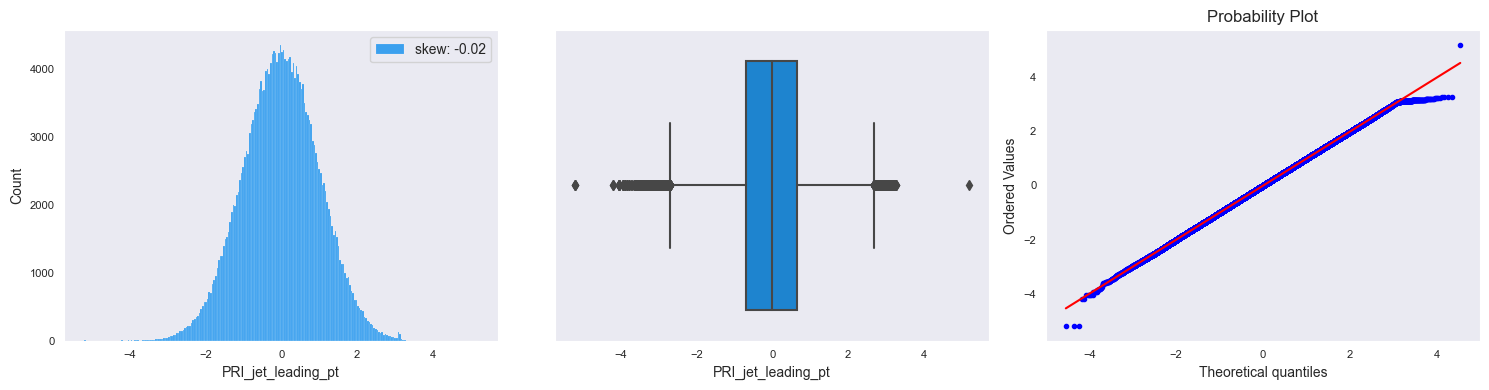

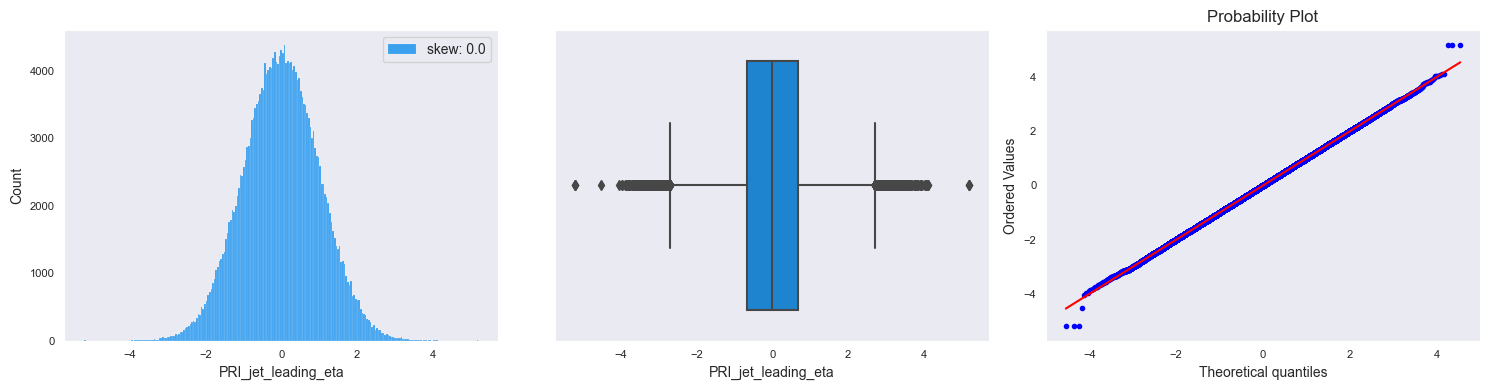

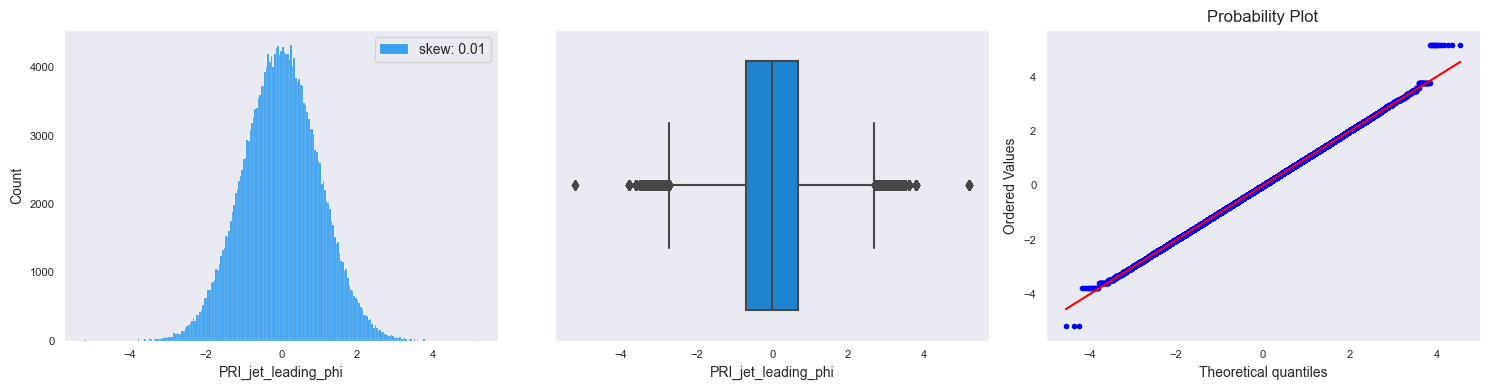

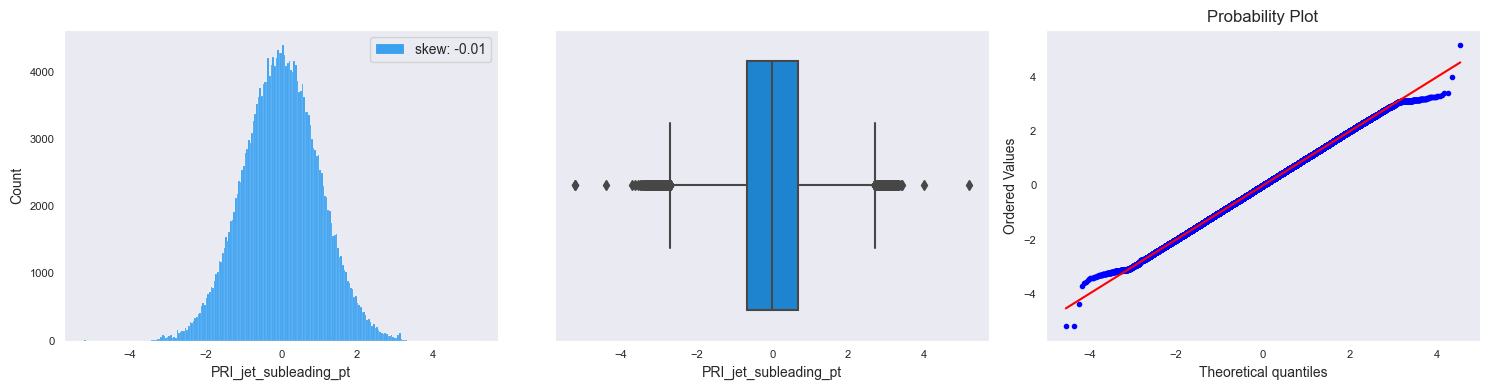

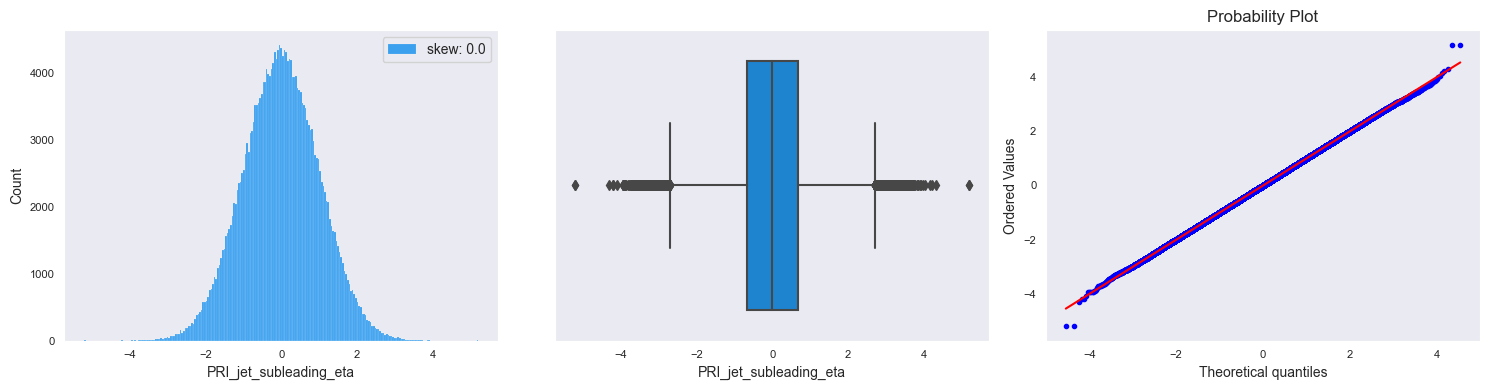

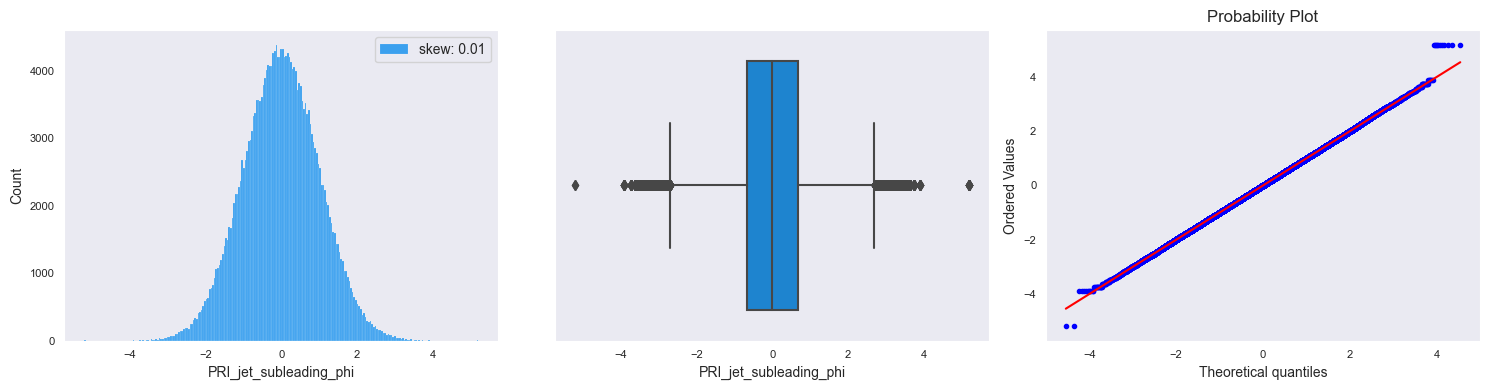

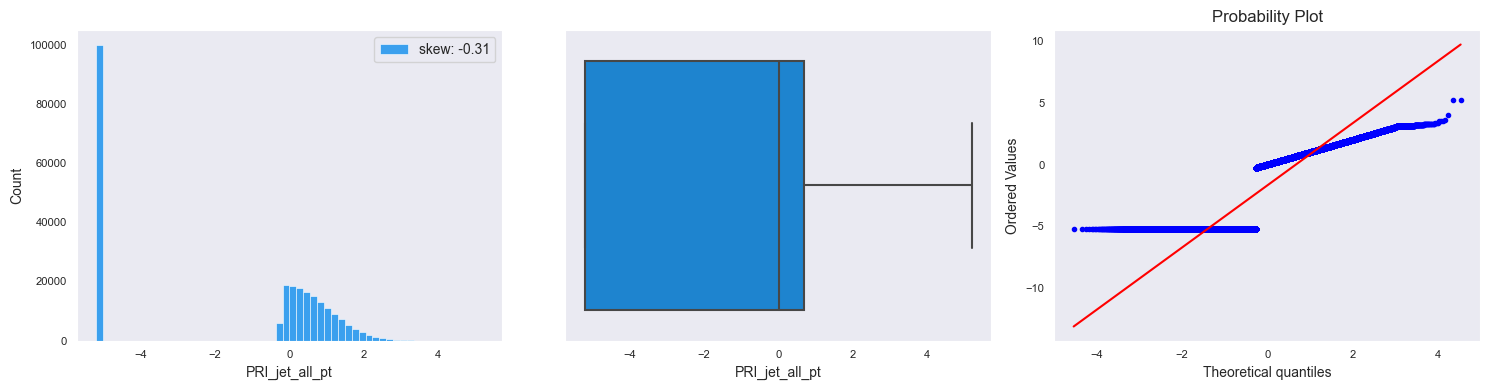

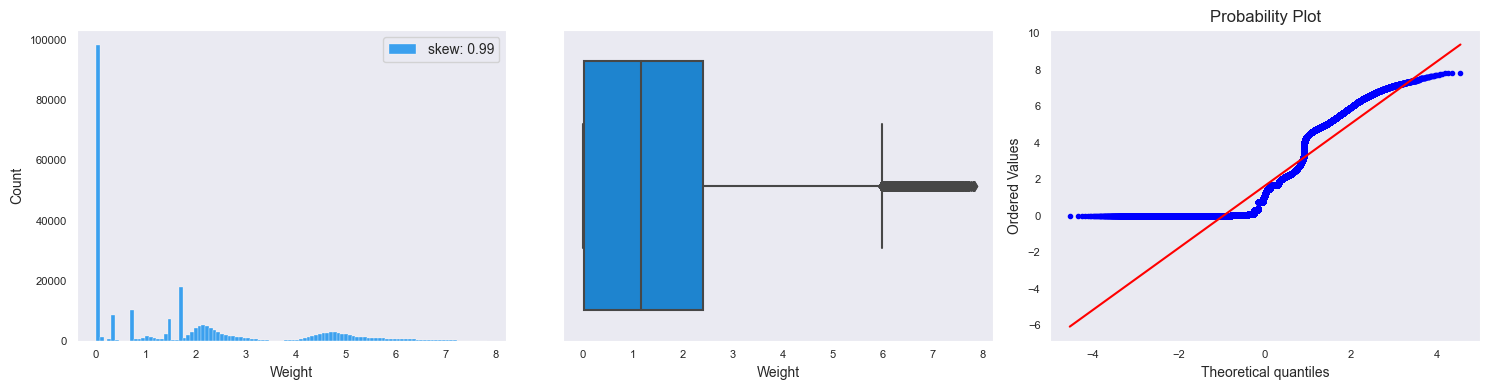

In [37]:
viz(df3, cols)

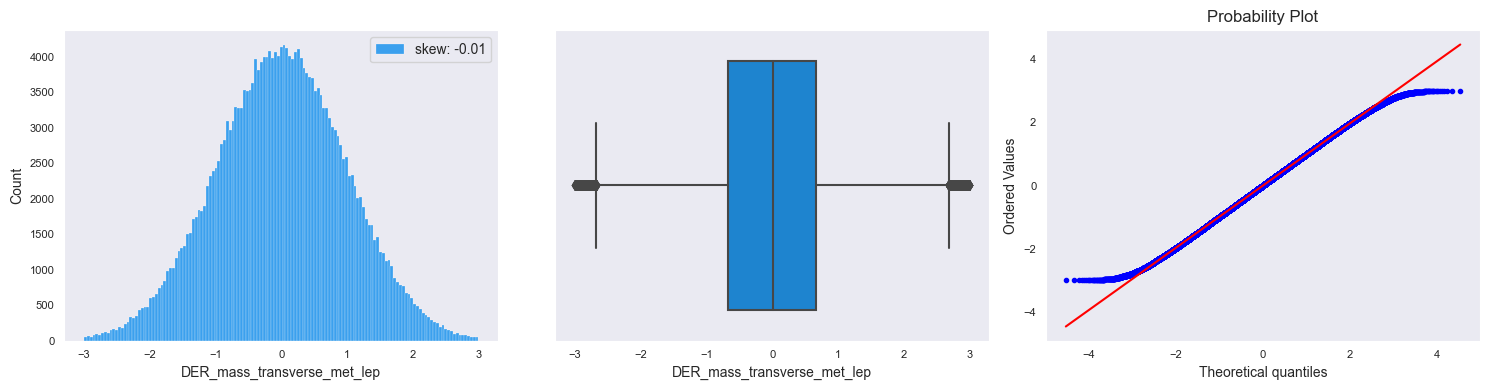

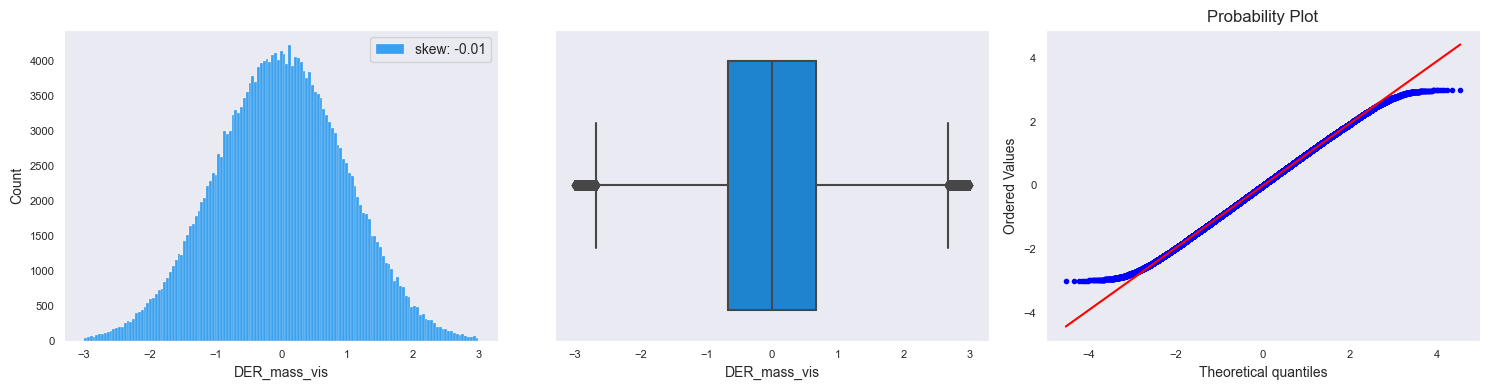

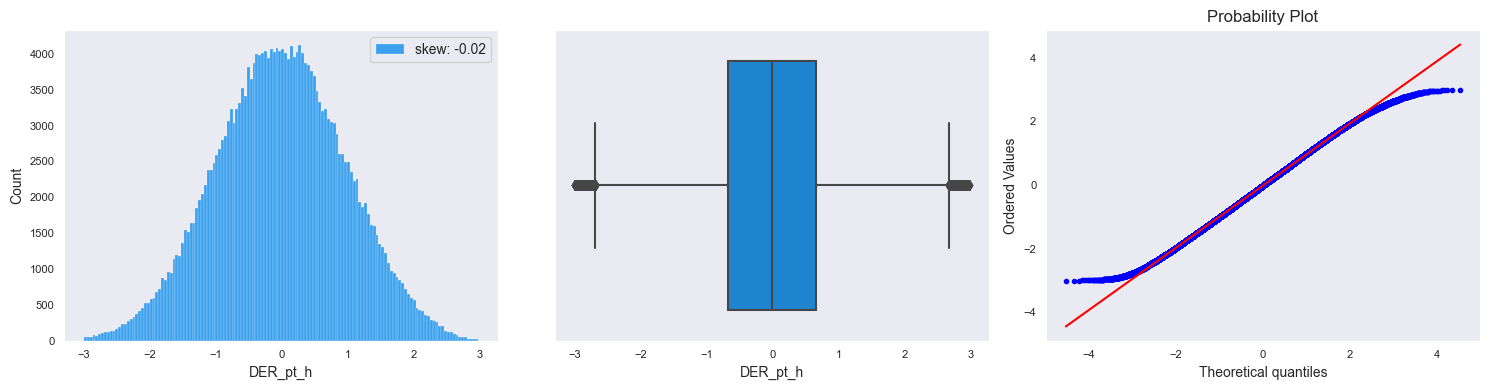

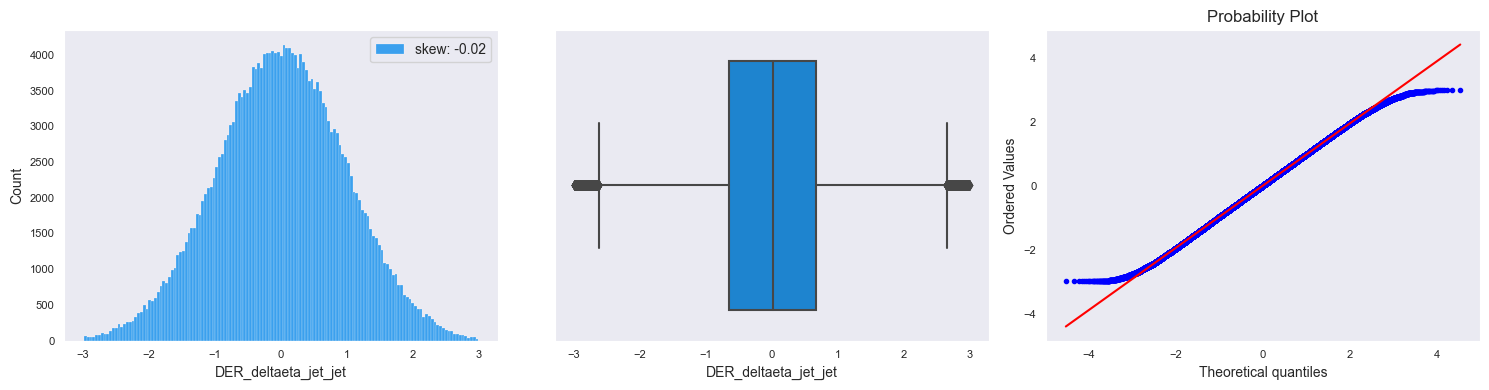

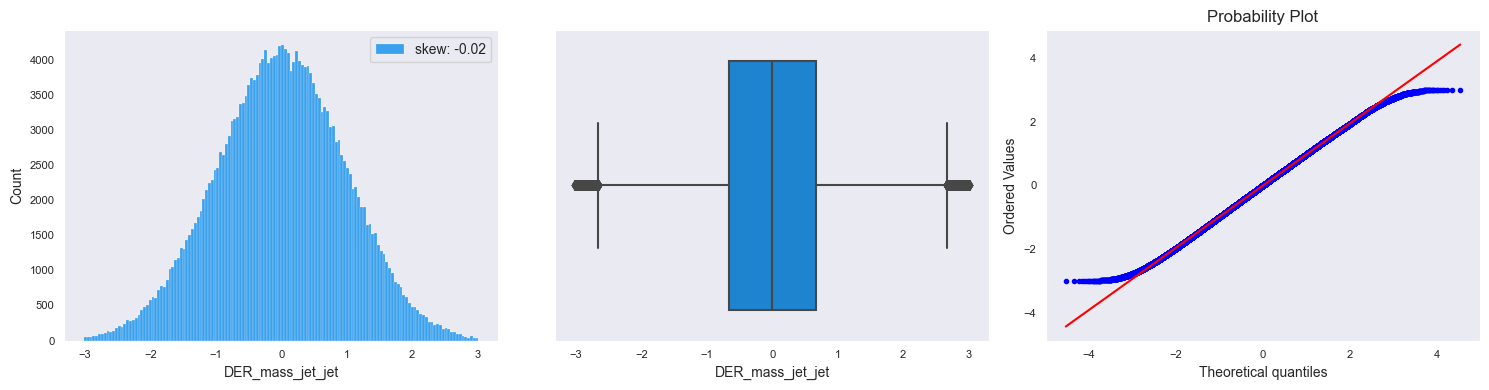

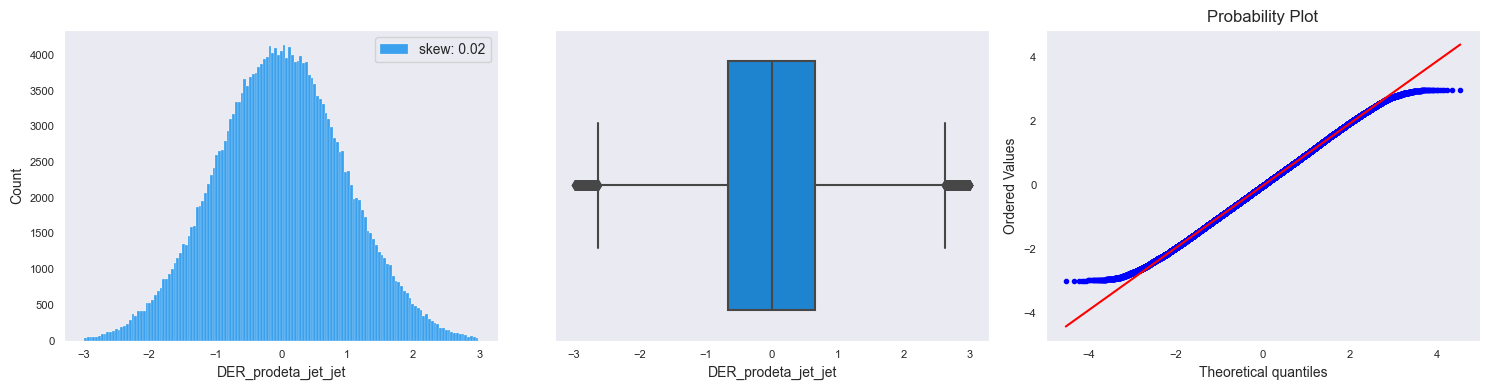

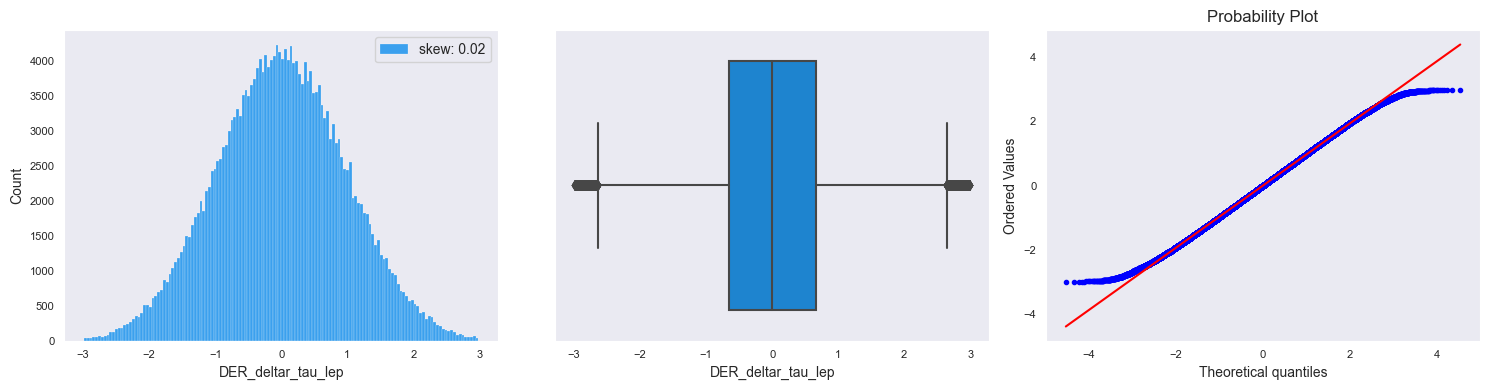

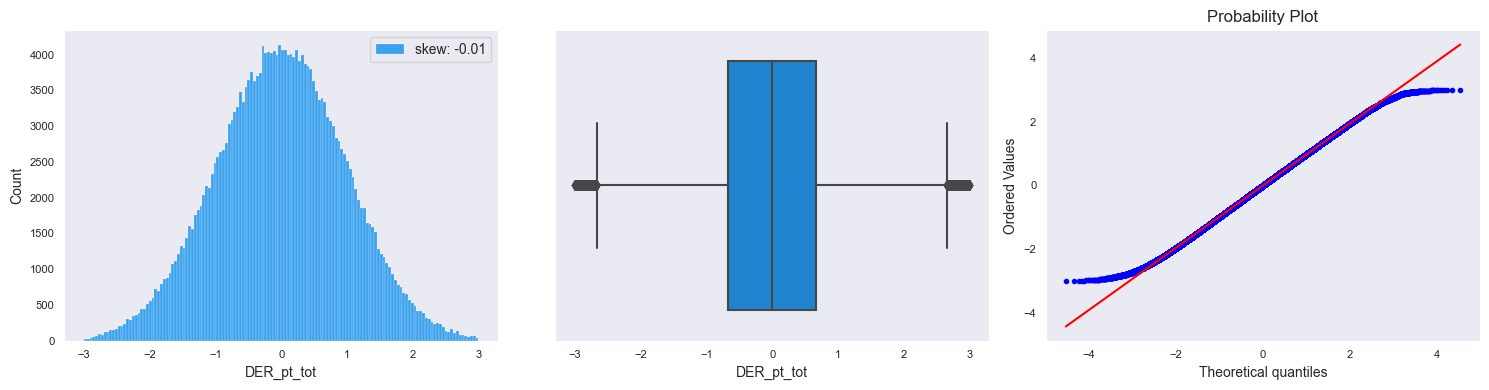

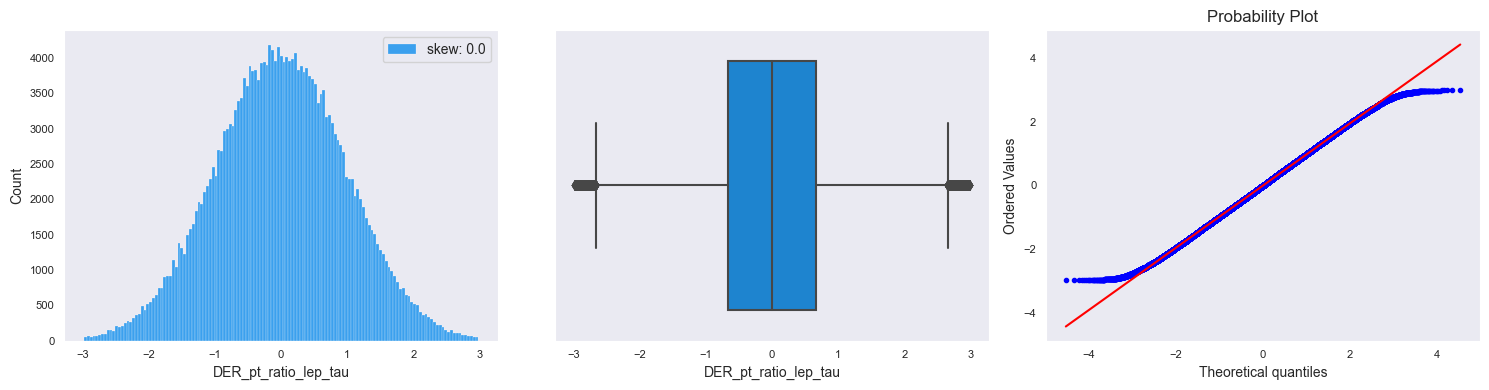

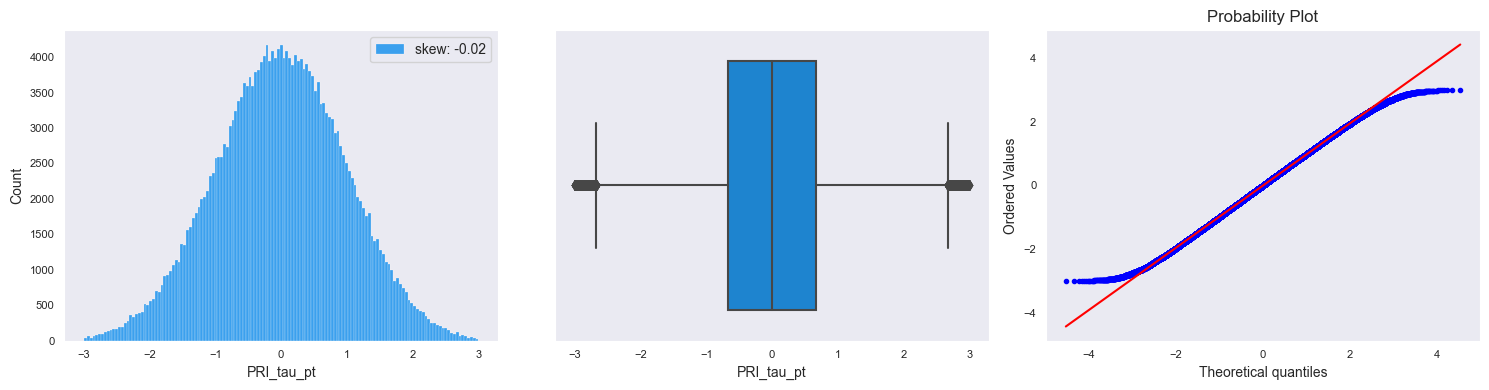

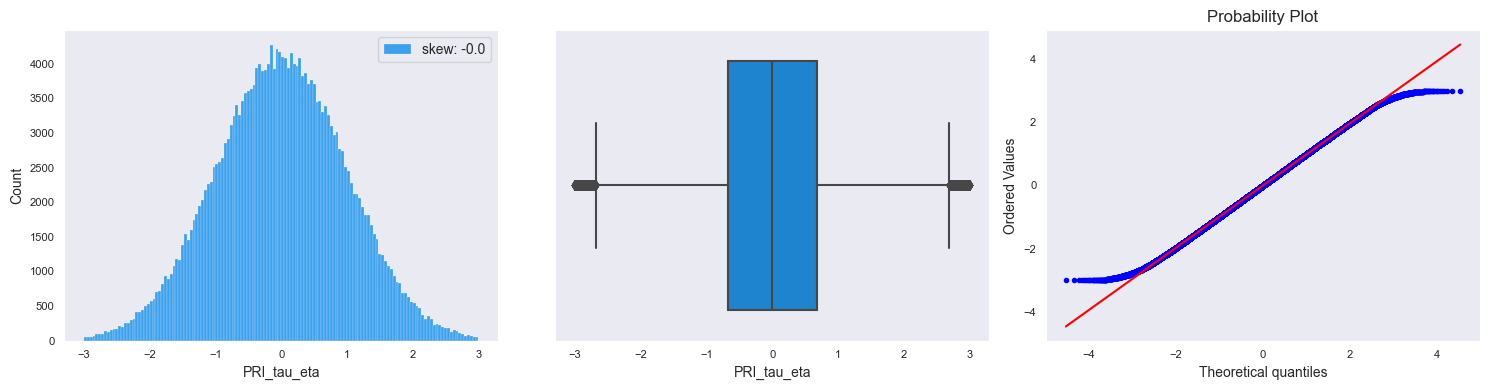

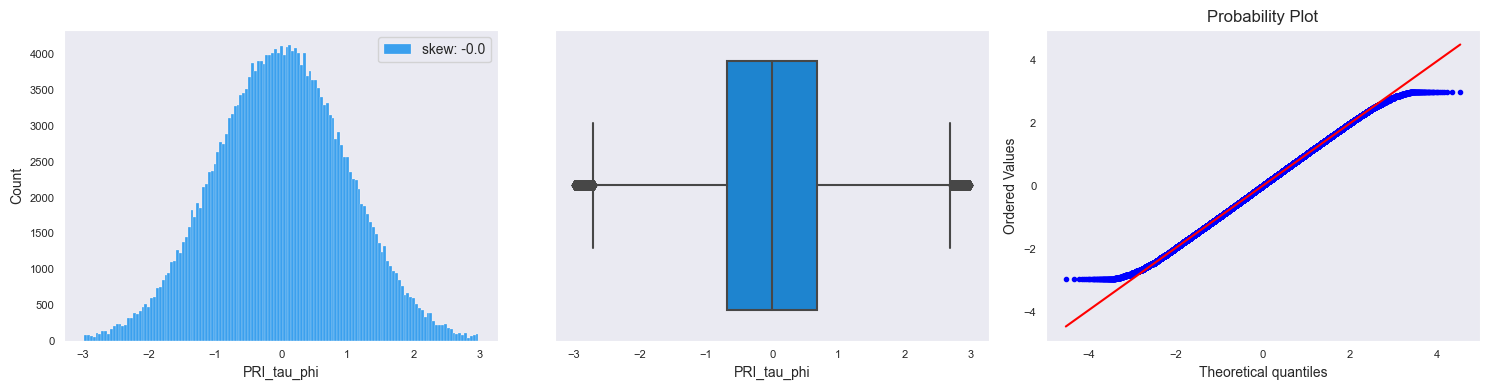

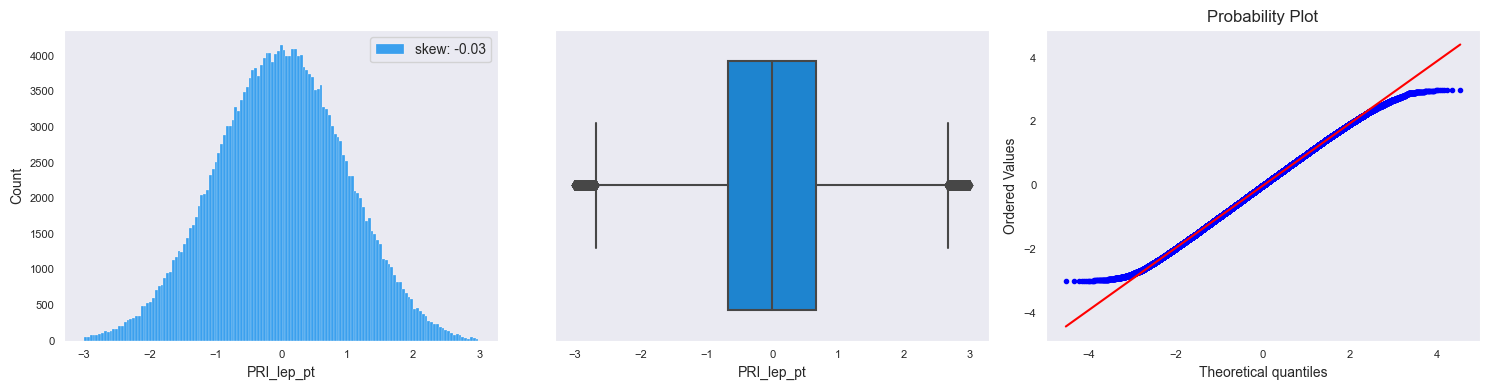

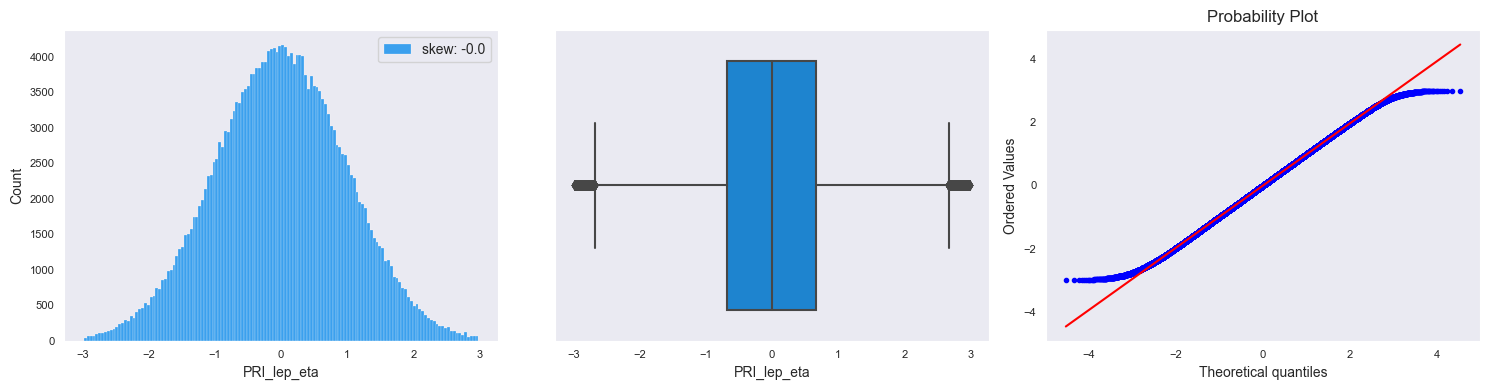

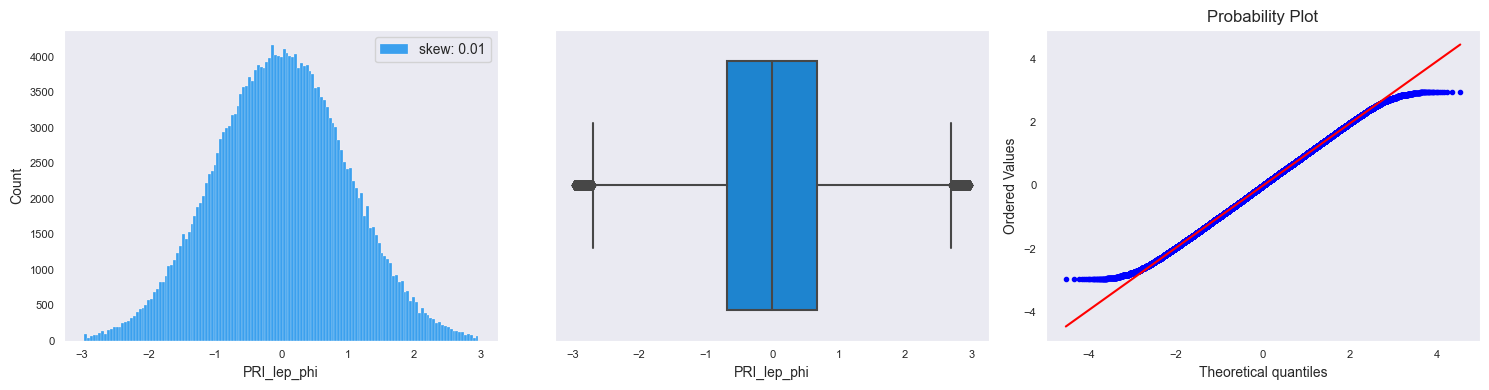

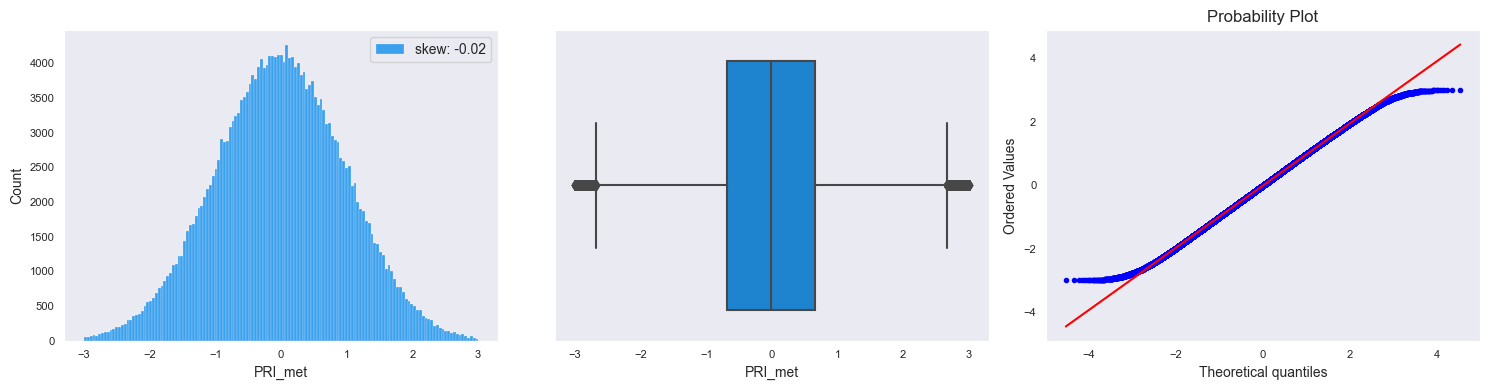

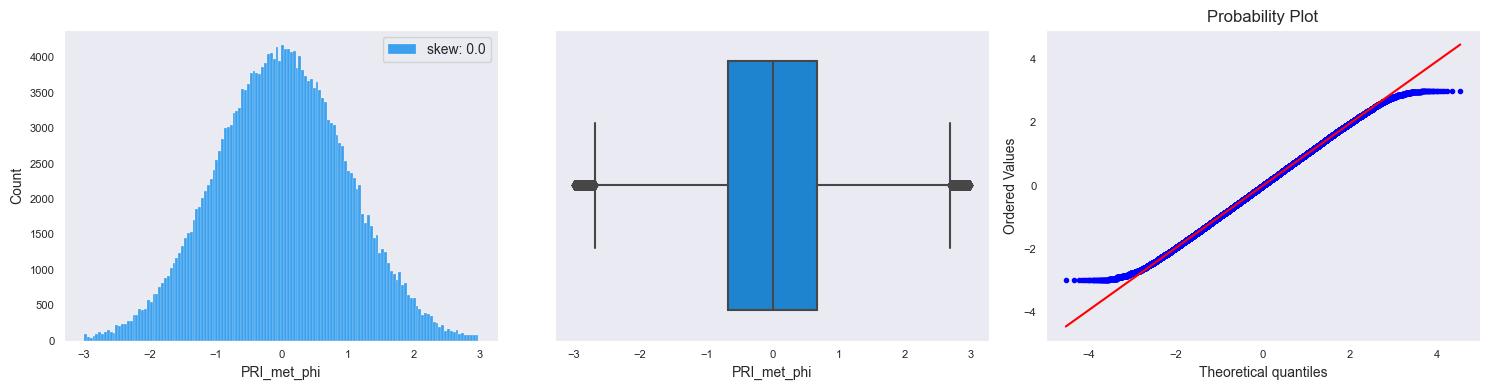

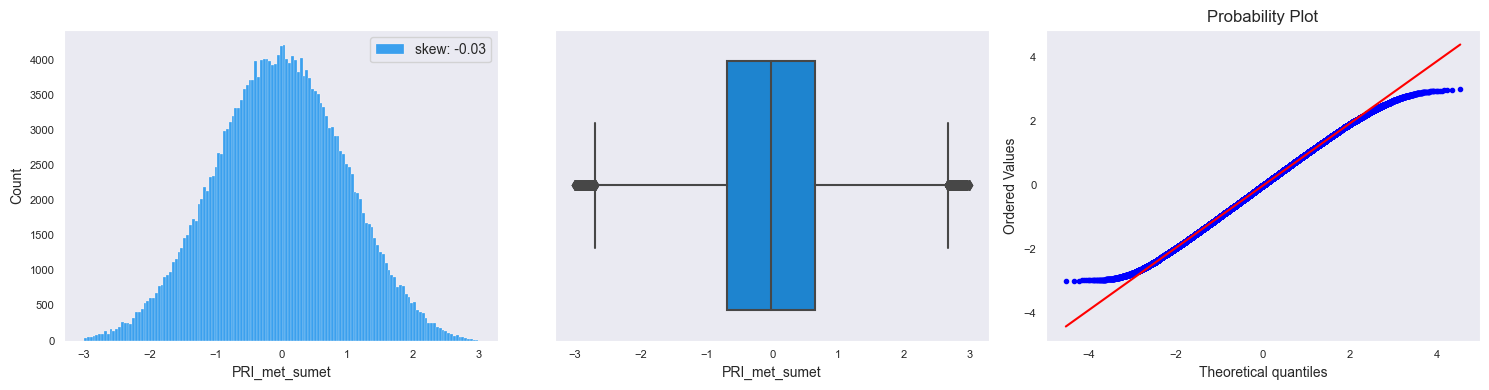

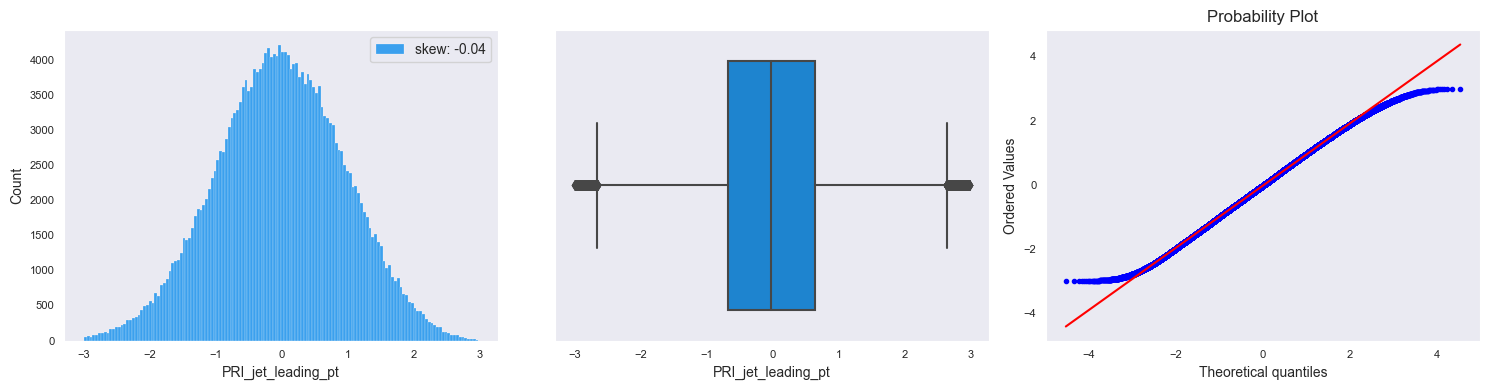

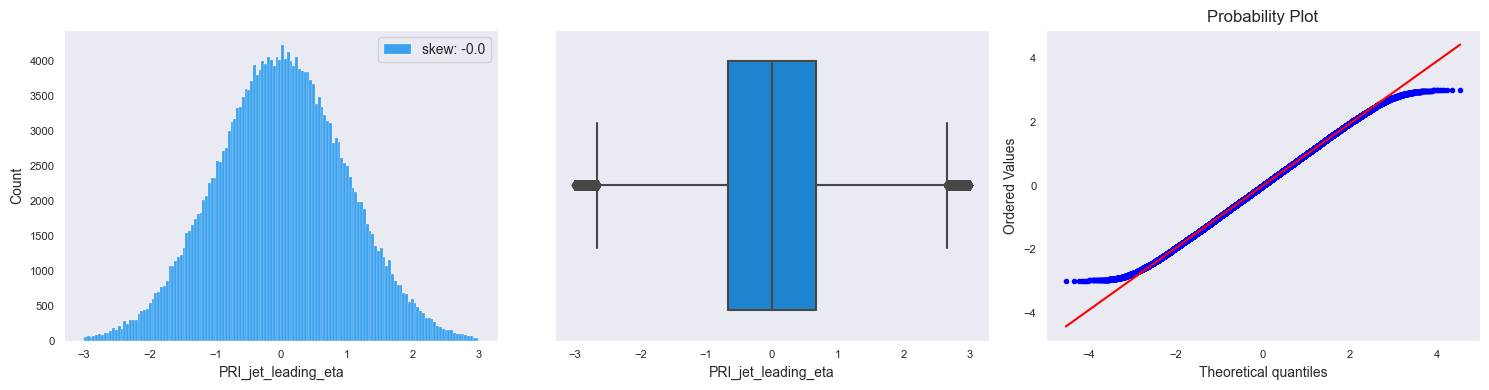

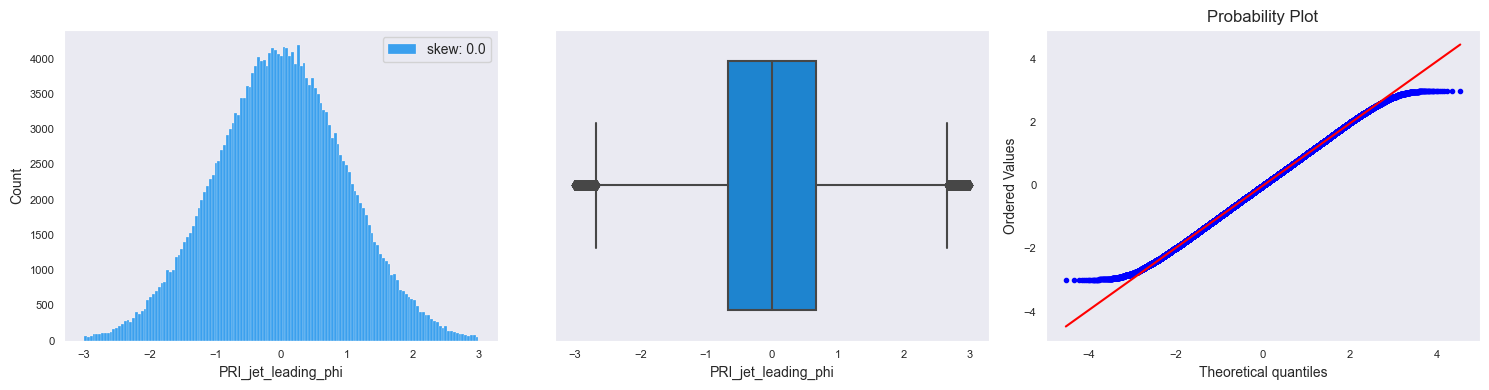

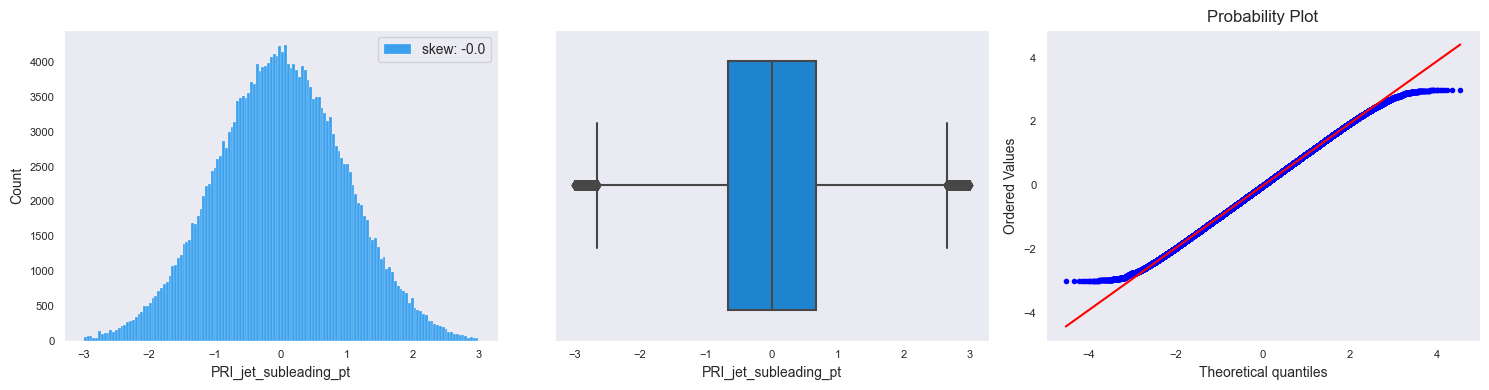

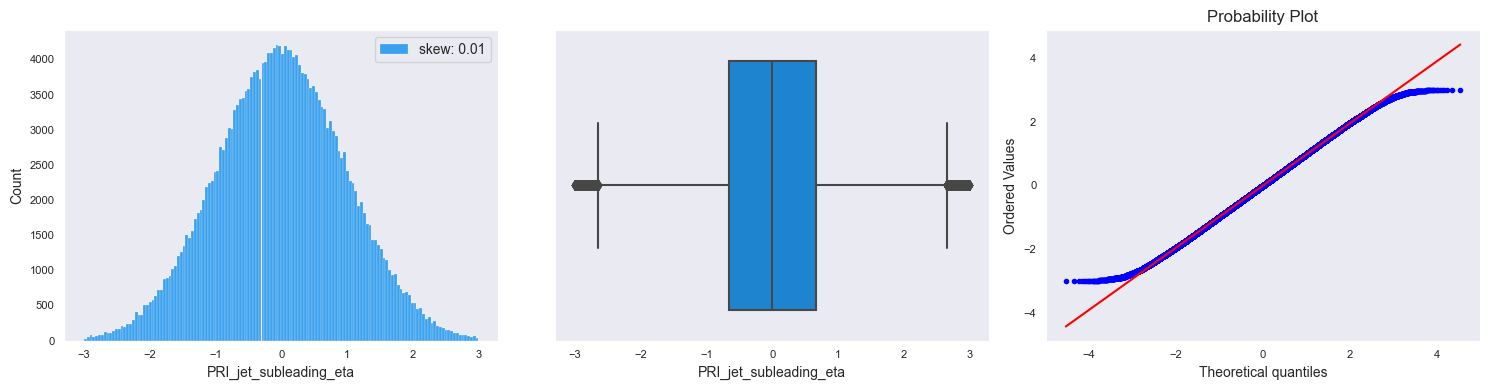

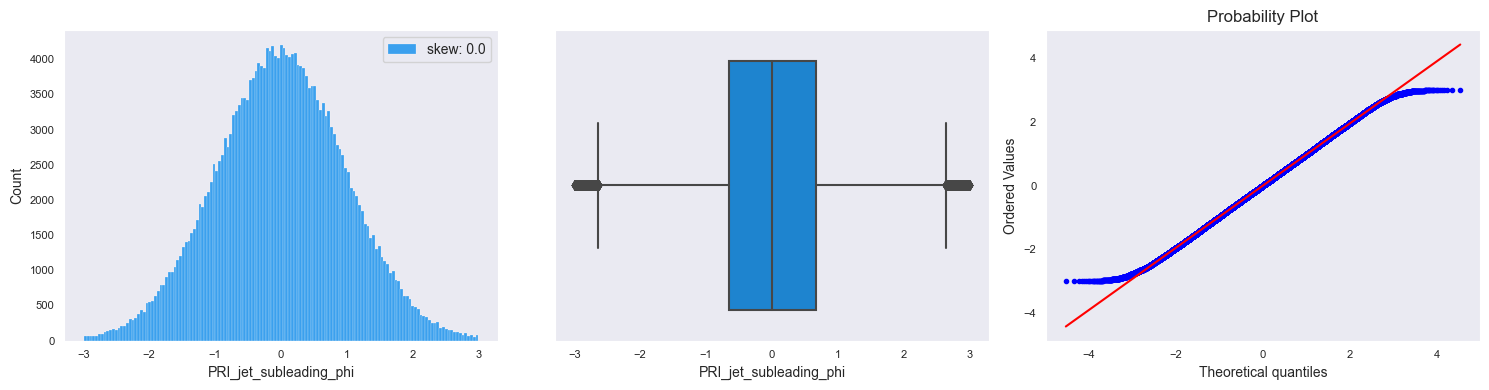

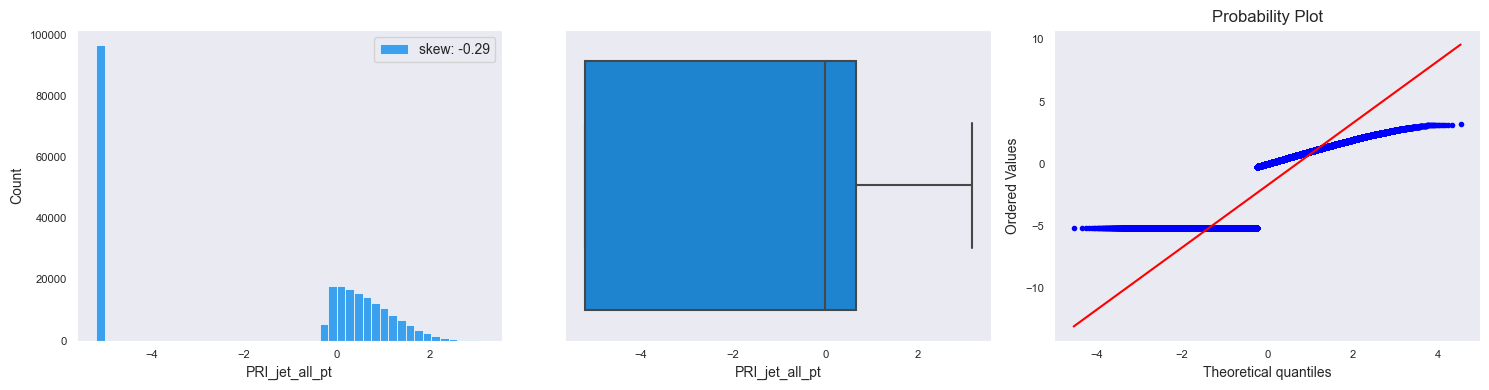

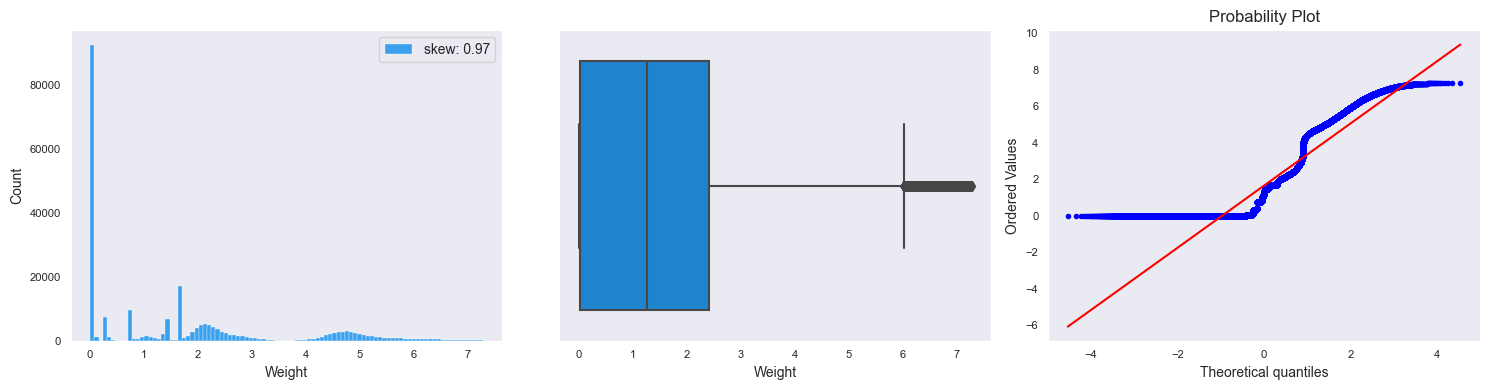

In [38]:
viz(df4, cols)

# Handling Class Imbalance:

Link -- https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/ **(Must read)**

Before using any class imbalence handling technique **(Random Undersampling, Random Oversampling, SMOTE, NearMiss, etc.)** it is must to perform the train-test split on the dataset.

In [46]:
# Original dataframe
x = df3.drop(columns='Label')
y = df3['Label']

# Outlier handled dataframe
x1 = df4.drop(columns='Label')
y1 = df4['Label']

## Random Under-Sampling:

In [47]:
from imblearn.under_sampling import RandomUnderSampler

### Original Dataframe:

In [49]:
# Original dataframe
rus = RandomUnderSampler(replacement=True)   

# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)


In [54]:
print('original dataset shape:', y.value_counts(), sep='\n', end='\n\n')
print('Resample dataset shape', y_rus.value_counts(), sep='\n')

original dataset shape:
0    164333
1     85667
Name: Label, dtype: int64

Resample dataset shape
0    85667
1    85667
Name: Label, dtype: int64


In [ ]:
x_rus['Label'] = y_rus.copy()

### Outlier handled dataframe

In [55]:
# Outlier handled dataframe
rus = RandomUnderSampler(replacement=True)   

# fit predictor and target variable
x_rus1, y_rus1 = rus.fit_resample(x1, y1)

In [56]:
print('original dataset shape:', y1.value_counts(), sep='\n', end='\n\n')
print('Resample dataset shape', y_rus1.value_counts(), sep='\n')

original dataset shape:
0    156001
1     80793
Name: Label, dtype: int64

Resample dataset shape
0    80793
1    80793
Name: Label, dtype: int64


In [71]:
x_rus1['Label'] = y_rus1.copy()
x_rus1

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,ind_15,ind_40,ind_70,Weight,Label
0,0.534192,-1.694643,-1.406761,0.216527,0.497499,-0.095918,-1.078193,-1.008062,0.003764,-1.169401,0.239832,-0.683950,-0.096753,-0.502182,-0.783330,0.078491,0.032087,0.297412,1.481255,-1.794433,-5.199338,-0.238791,0.008259,-0.361496,0.396053,-0.028481,-0.169763,-5.199338,True,True,True,4.429391,0
1,-0.142170,-0.375031,-0.159651,0.597100,0.323189,-0.410488,-0.161705,0.915764,-0.306306,-0.087322,0.064554,-0.364579,-1.645582,-0.845819,-1.018934,-0.287878,1.375340,-1.180920,-0.300105,-1.065928,-5.199338,-0.889817,-0.444301,-0.137473,-1.103044,-0.590184,-0.142548,-5.199338,False,True,True,1.681611,0
2,1.429506,-0.723377,-0.401997,0.189404,0.250117,-0.020547,-0.652859,0.460582,0.610484,-0.035135,0.018569,-1.355761,1.471555,0.151968,-0.257259,0.047064,0.254902,1.035245,-1.016973,-1.802171,-5.199338,-0.040637,0.344331,0.189802,-0.671161,0.429607,0.104913,-5.199338,True,True,True,5.822903,0
3,-0.062107,-0.728761,-0.563595,-1.161155,-1.662001,1.327386,0.670557,0.476366,0.086674,-5.199338,1.798663,-0.661943,1.056232,0.748009,-0.614920,0.662411,-0.739031,-0.474991,0.045359,-0.548125,0.880888,-1.776721,0.284814,-1.327982,-1.829450,1.560005,1.194764,0.290671,False,False,False,1.454848,0
4,0.567867,-0.422543,-1.476426,0.524773,0.642214,-0.375399,-0.247134,-1.100140,0.133379,-0.844485,0.322892,-0.686270,0.290058,0.498413,-0.560593,-0.786886,-0.222320,0.256840,-1.926403,-2.049900,-5.199338,-0.405643,-0.212645,0.456033,0.364402,-0.178444,0.414831,-5.199338,True,True,True,5.355561,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161581,-0.395751,0.770658,1.416574,-1.396948,-1.226112,1.038206,-0.987652,0.460582,1.071858,0.231172,-1.365257,0.572424,1.604154,1.061150,1.739136,0.587367,-2.173482,0.277656,-1.328848,1.433916,0.880888,1.545825,0.419741,0.042362,-1.495672,-0.828797,-1.897598,1.258471,False,False,False,0.018636,1
161582,-1.988654,1.263572,-0.768699,1.341898,1.255612,-1.383640,0.837338,-0.101796,-1.084195,0.207736,1.170933,1.432293,0.108524,0.803958,0.375489,0.372918,-0.639462,-0.480554,-0.589873,0.322618,-5.199338,0.069058,0.169141,0.298788,-0.517273,0.230455,0.170302,-5.199338,False,True,True,0.018636,1
161583,0.802161,0.571099,0.549594,-0.337523,-0.041341,0.212919,-0.012128,-0.763183,-1.223287,0.074716,-0.368827,1.156625,-0.605955,-0.276998,-0.261424,-0.788711,0.738638,0.303762,-0.439922,0.217035,0.137177,0.602745,-0.985638,1.563386,0.818034,-0.083544,-0.992407,0.343437,False,False,True,0.001502,1
161584,-1.577372,-0.311034,0.655733,-1.426611,-0.756043,1.048748,0.995858,1.463885,0.115678,-0.066084,-1.851734,-0.352914,2.552325,0.574383,-0.244234,1.295777,-0.759917,1.116766,-0.772899,2.446444,5.199338,1.520735,-0.322986,0.834251,2.368647,0.876242,-1.713567,2.693597,False,False,False,0.001503,1


## Random Over-Sampling:

It wont help much & will lead to overfitting as the dataset is huge.

## SMOTE:

In [ ]:
from imblearn.over_sampling import SMOTE

### Original Dataframe:

In [84]:
smote = SMOTE(sampling_strategy=0.9, n_jobs=-1)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

from collections import Counter
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_smote))


original dataset shape:
0    164333
1     85667
Name: Label, dtype: int64

Resample dataset shape
0    164333
1    147899
Name: Label, dtype: int64


In [ ]:
x_smote['Label'] = y_smote
x_smote.to_csv('../data/interim/train_Outlier_smote.csv', index=False)

### Outlier removed Dataset:

In [ ]:
smote = SMOTE(sampling_strategy=0.9, n_jobs=-1)

# fit predictor and target variable
x_smote1, y_smote1 = smote.fit_resample(x1, y1)

print('original dataset shape:', Counter(y1))
print('Resample dataset shape', Counter(y_smote1))


In [ ]:
x_smote1['Label'] = y_smote1
x_smote.to_csv('../data/interim/train_dropOutlier_smote.csv', index=False)
